## Importing the Python Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

## Load the Dataset

In [49]:
data = pd.read_csv('Featured_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14246 non-null  float64
 1   Latitude          14246 non-null  float64
 2   Speed             14246 non-null  float64
 3   Distance          14246 non-null  float64
 4   Time              14246 non-null  object 
 5   Acc X             14246 non-null  float64
 6   Acc Y             14246 non-null  float64
 7   Acc Z             14246 non-null  float64
 8   Heading           14246 non-null  int64  
 9   gyro_x            14246 non-null  float64
 10  gyro_y            14246 non-null  float64
 11  gyro_z            14246 non-null  float64
 12  label             14246 non-null  int64  
 13  Acc_Magnitude     14246 non-null  float64
 14  Acc_Change        14246 non-null  float64
 15  Gyro_Magnitude    14246 non-null  float64
 16  Gyro_Change       14246 non-null  float6

In [52]:
data.describe().T

count          mean            std         min  \
Longitude         14246.0  7.382656e+01       0.003661   73.821195   
Latitude          14246.0  1.850857e+01       0.005242   18.501504   
Speed             14246.0  7.718982e-01       0.705439    0.000000   
Distance          14246.0  2.795223e+03  120598.784322    0.000000   
Acc X             14246.0 -1.136666e-03       1.030982   -8.805807   
Acc Y             14246.0  1.802373e-01       0.837260   -8.476646   
Acc Z             14246.0 -2.357613e-02       1.768811  -17.320633   
Heading           14246.0  1.712691e+02     105.496919    0.000000   
gyro_x            14246.0 -1.318720e-03       0.141039   -2.062668   
gyro_y            14246.0 -6.521074e-03       0.087850   -0.571912   
gyro_z            14246.0 -3.200064e-03       0.068017   -0.666047   
label             14246.0  5.925874e-01       0.491370    0.000000   
Acc_Magnitude     14246.0  1.607835e+00       1.529821    0.018581   
Acc_Change        14246.0  2.191194e-05       1.355076  -16.179881   
Gyro_Magnitude    14246.0  1.266961e-01       0.127425    0.001460   
Gyro_Change       14246.0 -1.334293e-06       0.104109   -1.387471   
Net_Displacement  14246.0  3.816505e-06       0.000016    0.000000   
Speed_Change      14246.0 -9.351872e-20       0.035884   -0.760000   
Heading_Change    14246.0 -2.393654e-02      17.575867 -359.000000   
Rolling_Acc_Mean  14246.0  1.608040e+00       1.227237    0.144979   
Rolling_Acc_STD   14246.0  7.429716e-01       0.700332    0.015304   
acc_mean          14246.0  5.184149e-02       0.691140   -9.247761   
acc_std           14246.0  9.265166e-01       0.940104    0.007141   
gyro_mean         14246.0 -3.679953e-03       0.051239   -0.780774   
gyro_std          14246.0  7.701864e-02       0.079085    0.000224   

                         25%          50%          75%           max  
Longitude          73.822785    73.828663    73.829445  7.383139e+01  
Latitude           18.504085    18.507860    18.513463  1.851871e+01  
Speed               0.000000     0.760000     1.220000  2.712000e+00  
Distance          448.081505  1007.368700  1645.653275  8.312031e+06  
Acc X              -0.378820    -0.013089     0.362683  1.048863e+01  
Acc Y              -0.126690     0.167227     0.478868  1.101326e+01  
Acc Z              -0.701545    -0.025761     0.674922  1.972580e+01  
Heading            77.000000   150.000000   249.000000  3.590000e+02  
gyro_x             -0.046690    -0.002219     0.044939  1.611687e+00  
gyro_y             -0.033272    -0.005783     0.021706  5.995846e-01  
gyro_z             -0.027224    -0.002179     0.024088  5.428556e-01  
label               0.000000     1.000000     1.000000  1.000000e+00  
Acc_Magnitude       0.609765     1.118237     2.065718  2.168270e+01  
Acc_Change         -0.480551    -0.013467     0.473513  1.631348e+01  
Gyro_Magnitude      0.040204     0.084782     0.168847  2.072244e+00  
Gyro_Change        -0.031879    -0.000116     0.030804  1.626290e+00  
Net_Displacement    0.000000     0.000000     0.000000  2.308554e-04  
Speed_Change        0.000000     0.000000     0.000000  9.280000e-01  
Heading_Change      0.000000     0.000000     0.000000  3.590000e+02  
Rolling_Acc_Mean    0.667844     1.284077     2.093364  1.251359e+01  
Rolling_Acc_STD     0.269350     0.527778     0.951488  7.277411e+00  
acc_mean           -0.226714     0.049606     0.320148  9.133835e+00  
acc_std             0.324081     0.622861     1.195859  1.371142e+01  
gyro_mean          -0.020247    -0.003754     0.014410  4.926764e-01  
gyro_std            0.023565     0.049857     0.104188  1.110263e+00

## Using IQR methods for finding outlier

Acc X:
Lower bound: -1.49107379375, Upper bound: 1.4749369162500001
Number of outliers: 1670
---
Acc Y:
Lower bound: -1.0350277387500002, Upper bound: 1.3872058312500002
Number of outliers: 1632
---
Acc Z:
Lower bound: -2.7662448150000003, Upper bound: 2.7396224250000003
Number of outliers: 1332
---
Heading:
Lower bound: -181.0, Upper bound: 507.0
Number of outliers: 0
---
gyro_x:
Lower bound: -0.18413514999999997, Upper bound: 0.182384002
Number of outliers: 1804
---
gyro_y:
Lower bound: -0.11573859949999998, Upper bound: 0.1041728845
Number of outliers: 1823
---
Gyro_Change:
Lower bound: -0.12590321832996487, Upper bound: 0.12482794114549185
Number of outliers: 1833
---
Net_Displacement:
Lower bound: 0.0, Upper bound: 0.0
Number of outliers: 1045
---
Speed_Change:
Lower bound: 0.0, Upper bound: 0.0
Number of outliers: 1022
---
Heading_Change:
Lower bound: 0.0, Upper bound: 0.0
Number of outliers: 6015
---
Rolling_Acc_Mean:
Lower bound: -1.4704366086614886, Upper bound: 4.231645083697

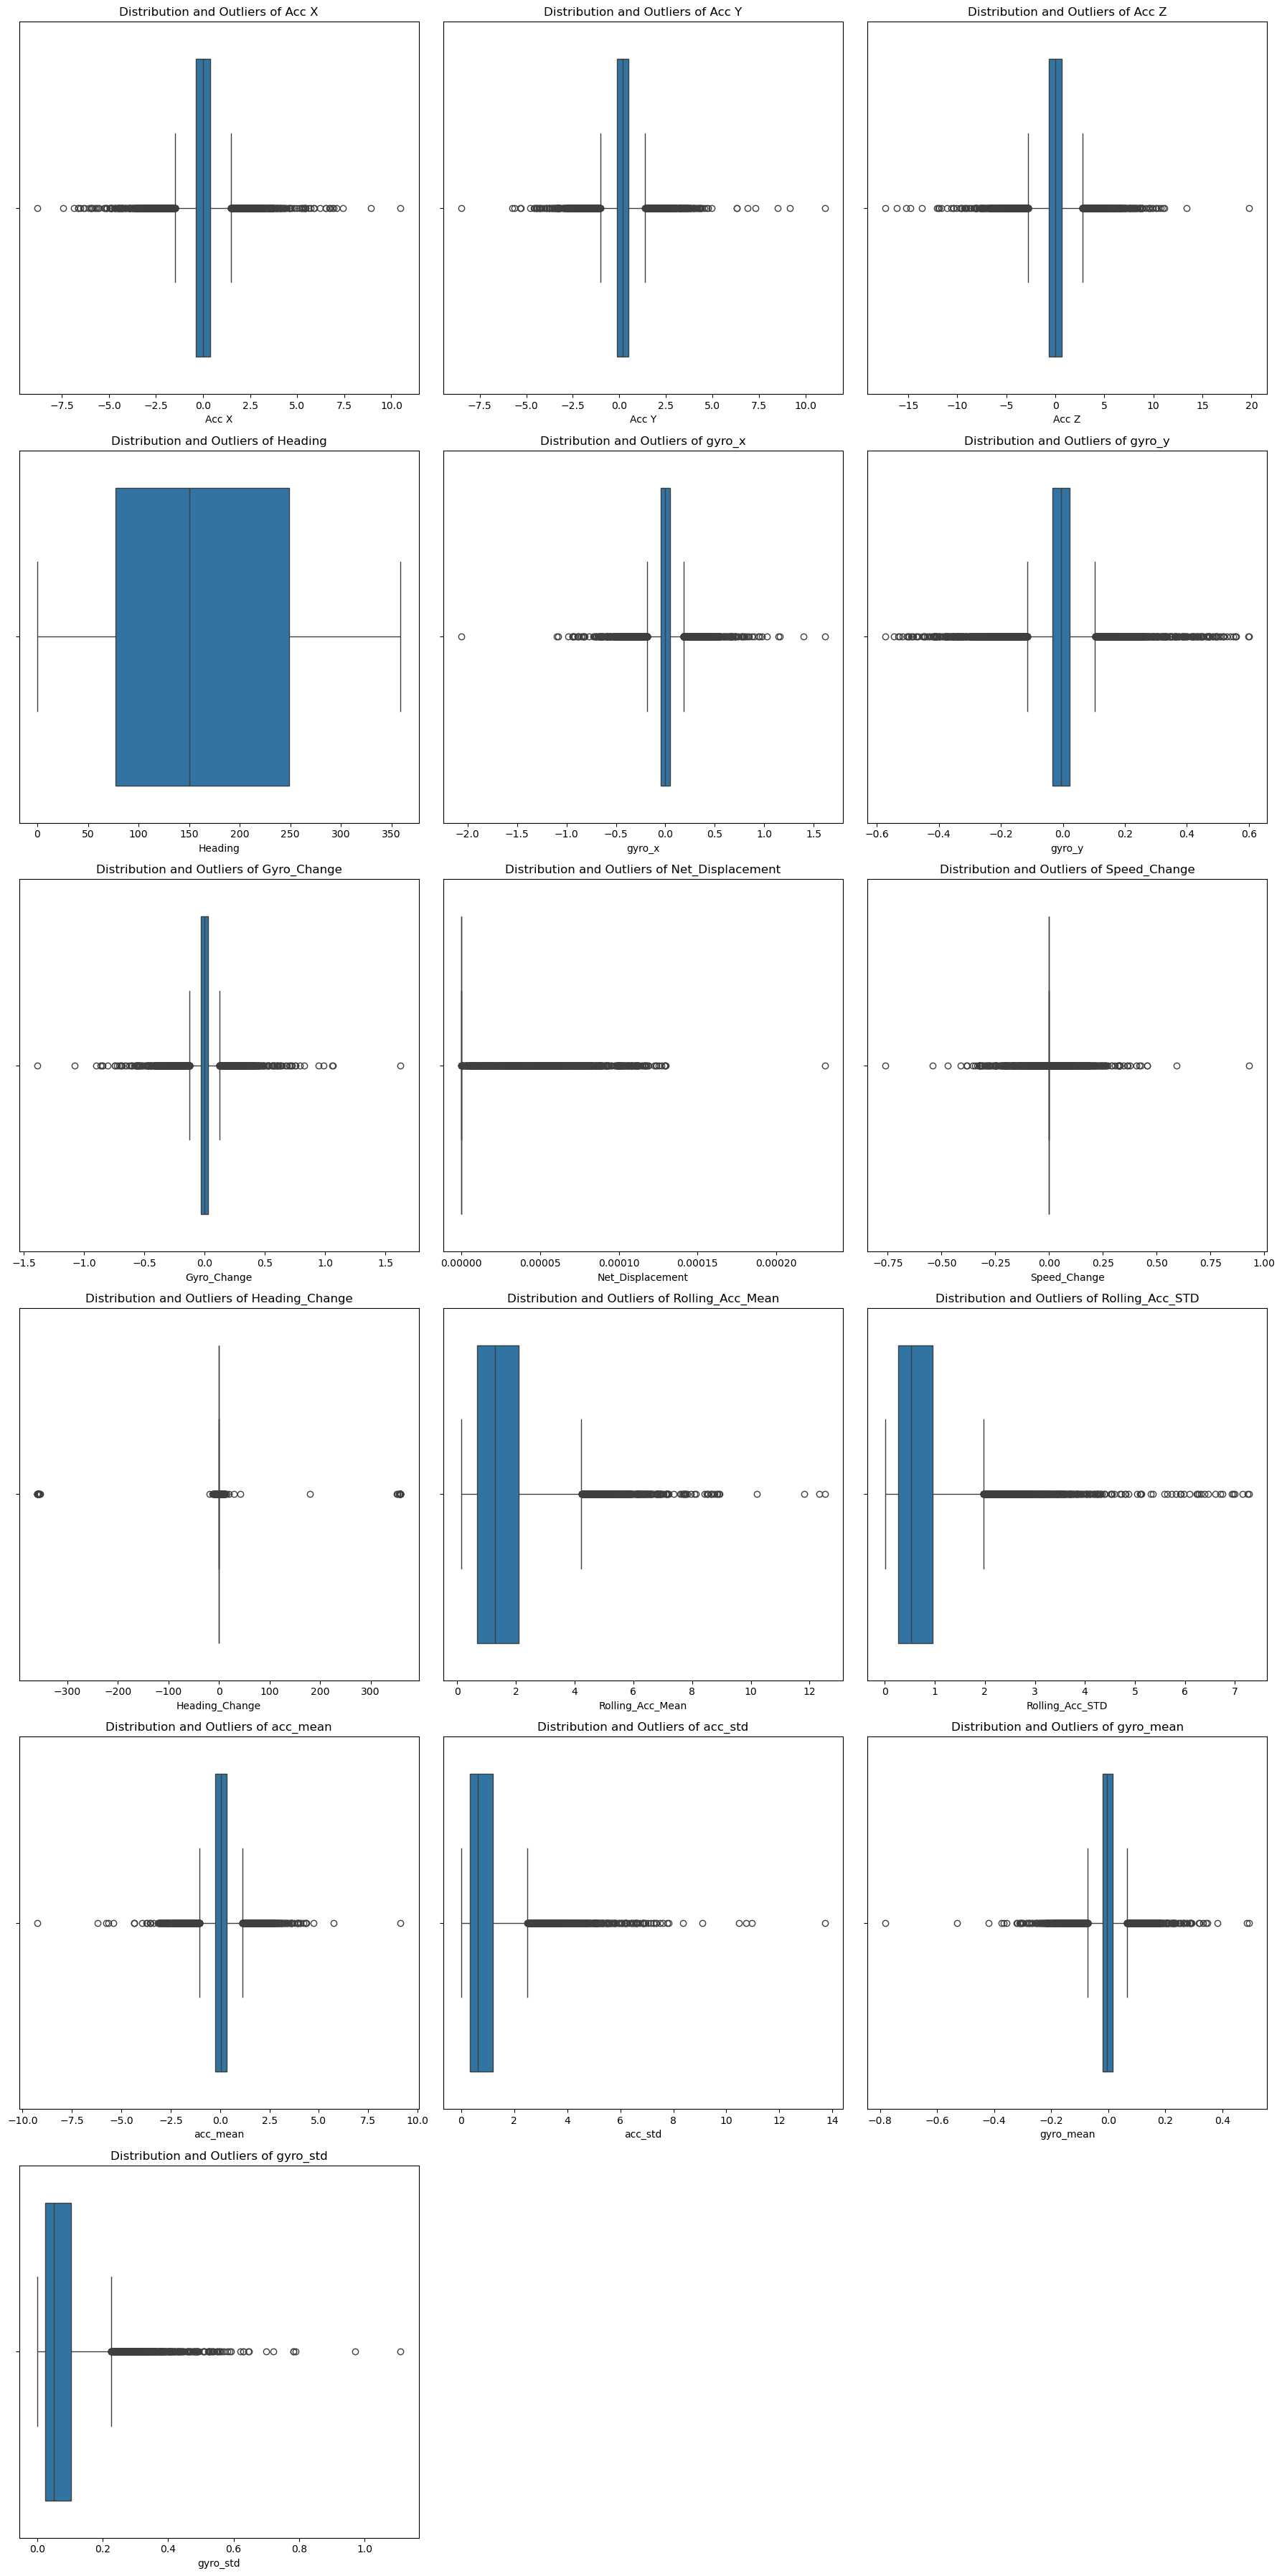

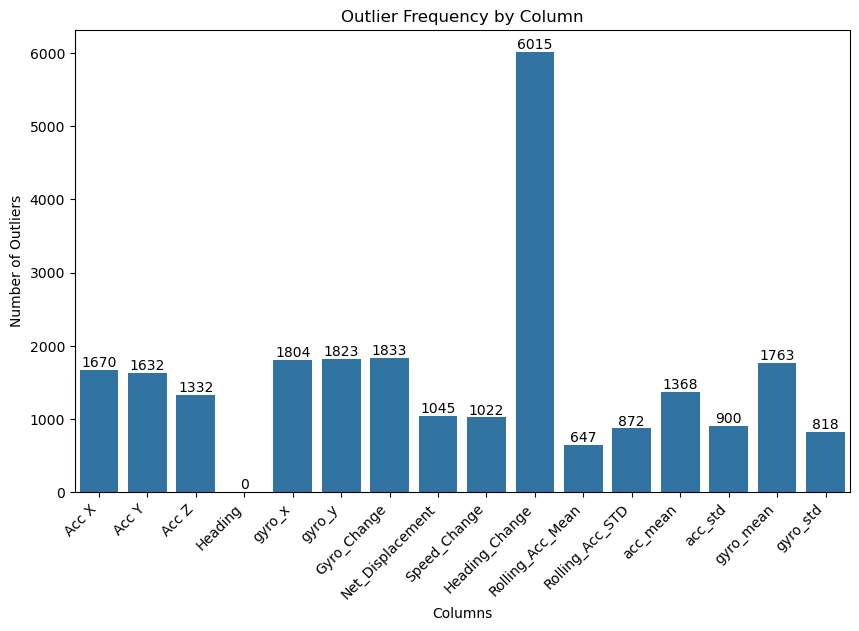

In [25]:
# Define a function to calculate IQR and identify outliers
def calculate_iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply the function to each numeric column
outliers_dict = defaultdict(list)
outlier_counts = {}

for col in ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
            'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']:
    outliers, lower_bound, upper_bound = calculate_iqr_outliers(data, col)
    outliers_dict[col] = outliers
    outlier_counts[col] = len(outliers)
    print(f'{col}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Number of outliers: {len(outliers)}')
    print('---')

# Plotting the distribution and outliers in subplots
def plot_distribution_with_outliers(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Create rows as per requirement, 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Distribution and Outliers of {col}')

    for j in range(i + 1, len(axes)):  # Hide any unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to be plotted
columns = ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
            'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']
plot_distribution_with_outliers(data, columns)

# Plotting the outlier frequency chart
def plot_outlier_frequency(outlier_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
    plt.title('Outlier Frequency by Column')
    plt.xlabel('Columns')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Outliers')
    
    # Adding text labels on top of each bar
    for i, count in enumerate(outlier_counts.values()):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
    plt.show()

plot_outlier_frequency(outlier_counts)
iqr_outlier = outlier_counts

## Using Z-Score for outliers detection

Acc X:
Mean: -0.0011366664637793085, Standard Deviation: 1.0309816764314736
Number of outliers: 274
---
Acc Y:
Mean: 0.18023726479671487, Standard Deviation: 0.8372602501422597
Number of outliers: 280
---
Acc Z:
Mean: -0.02357612855987646, Standard Deviation: 1.7688114642038109
Number of outliers: 293
---
Heading:
Mean: 171.26912817633018, Standard Deviation: 105.49691944039361
Number of outliers: 0
---
gyro_x:
Mean: -0.0013187204695353084, Standard Deviation: 0.14103872710719484
Number of outliers: 275
---
gyro_y:
Mean: -0.006521073514390004, Standard Deviation: 0.08784976524291623
Number of outliers: 357
---
Gyro_Change:
Mean: -1.3342931792891394e-06, Standard Deviation: 0.10410917182094091
Number of outliers: 295
---
Net_Displacement:
Mean: 3.816505288201474e-06, Standard Deviation: 1.570361489235633e-05
Number of outliers: 527
---
Speed_Change:
Mean: -9.351871609926912e-20, Standard Deviation: 0.035883732158331474
Number of outliers: 346
---
Heading_Change:
Mean: -0.023936543591183

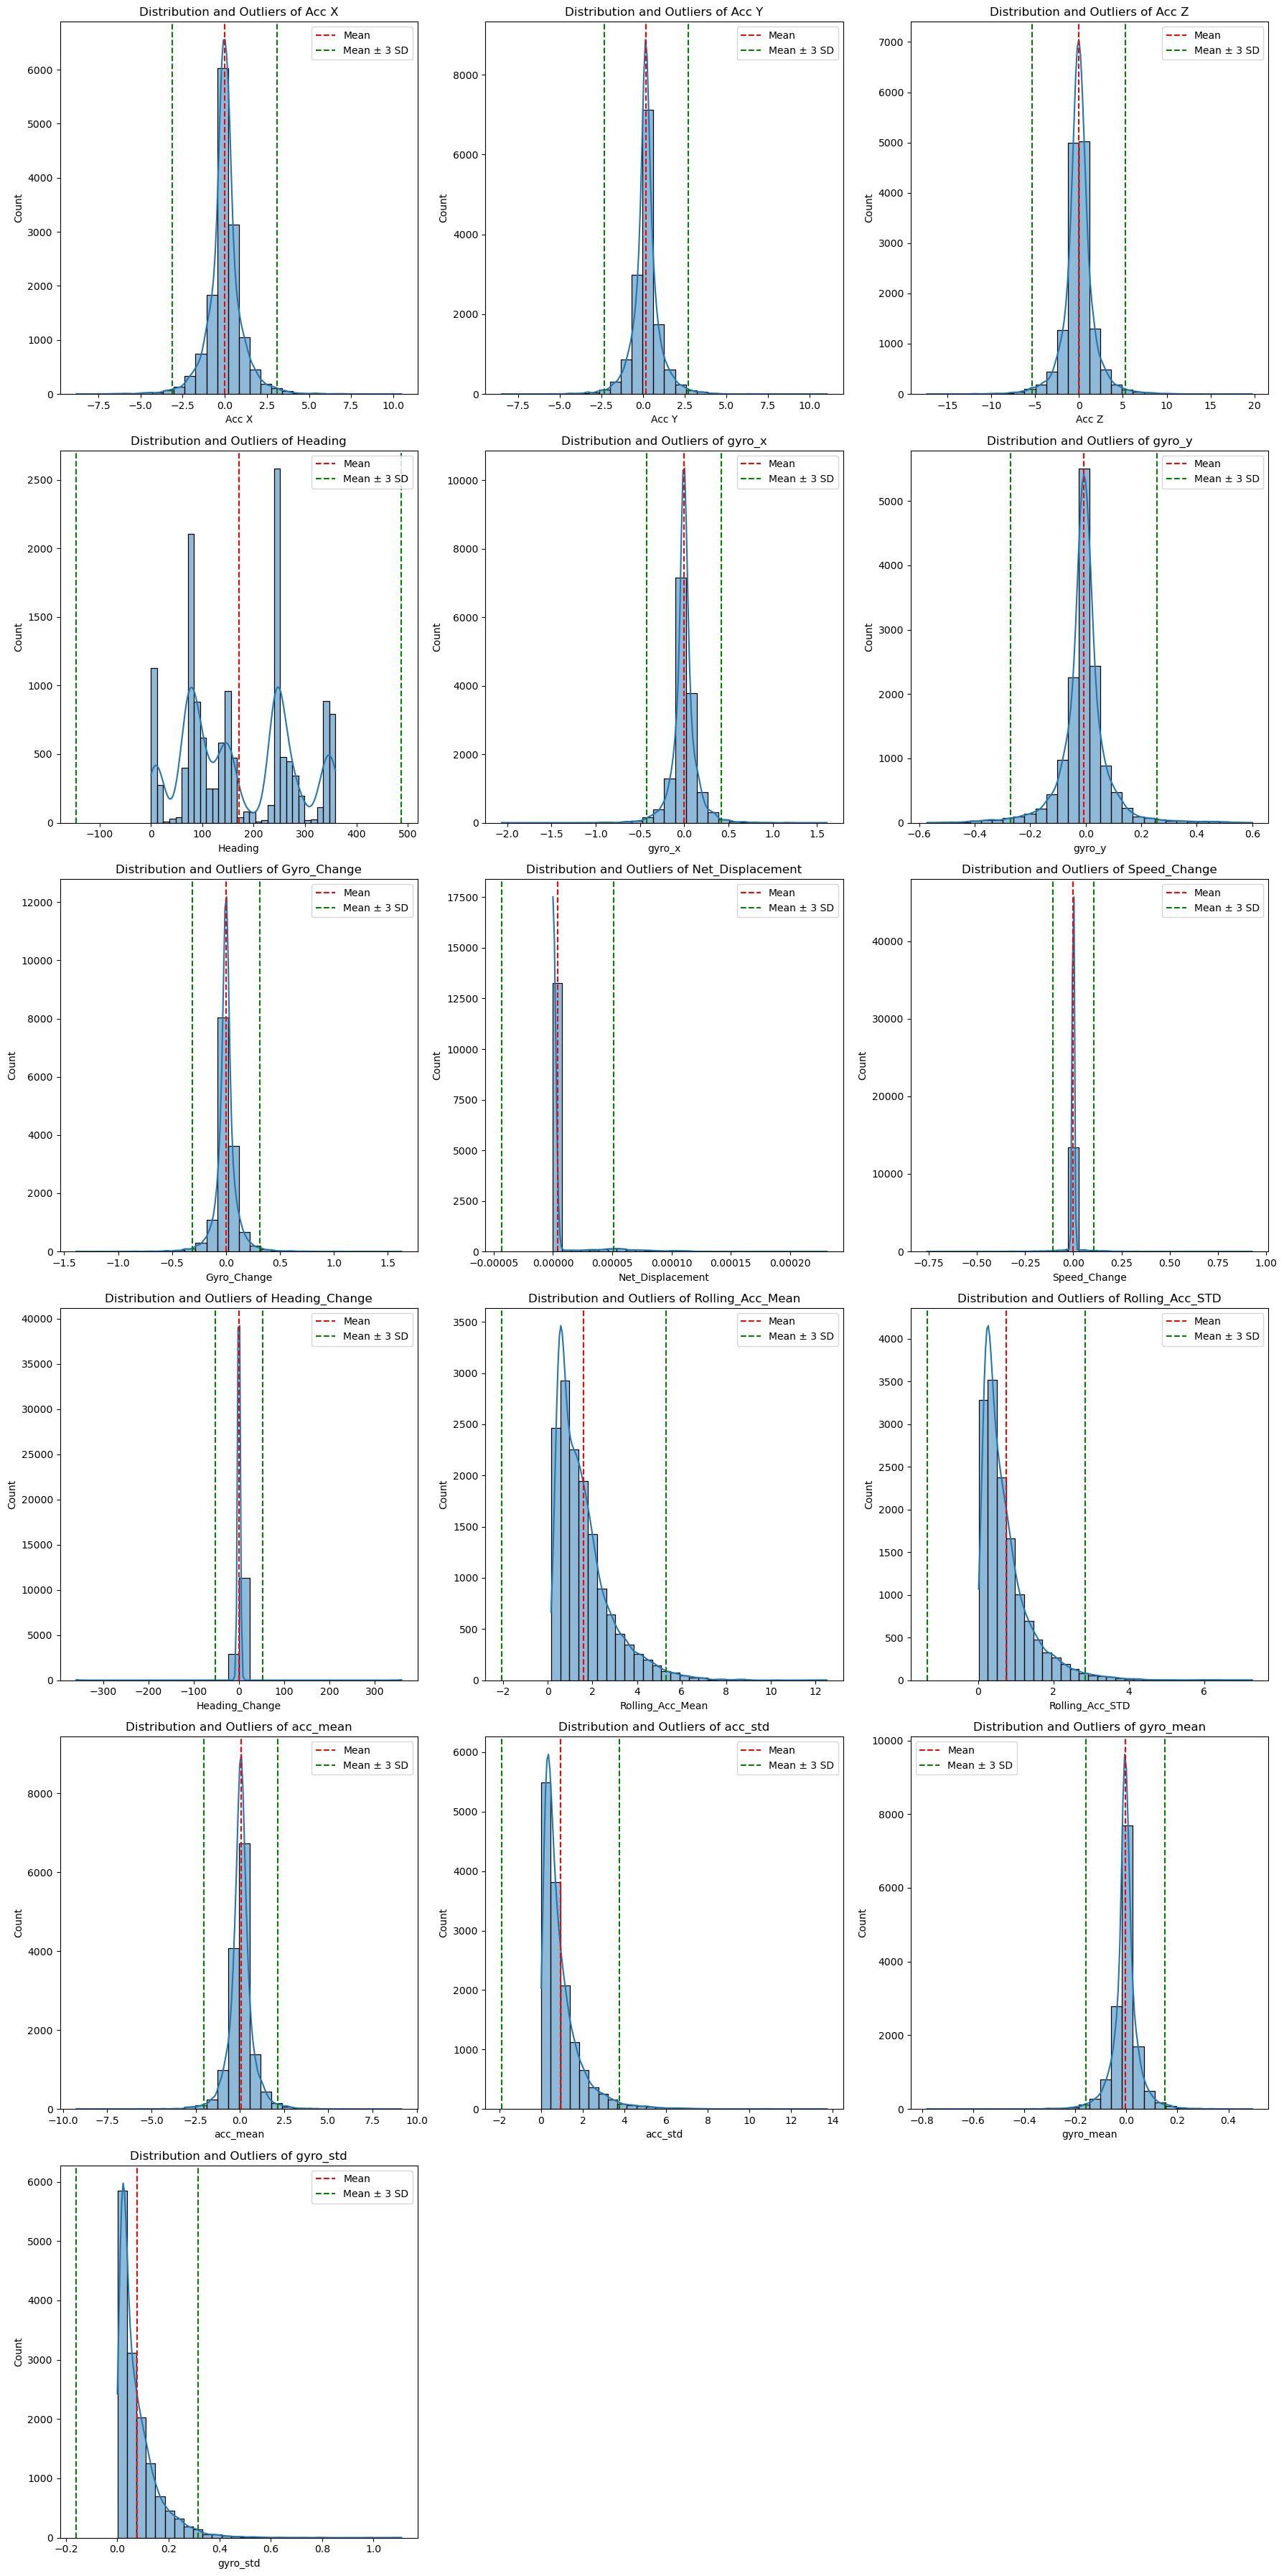

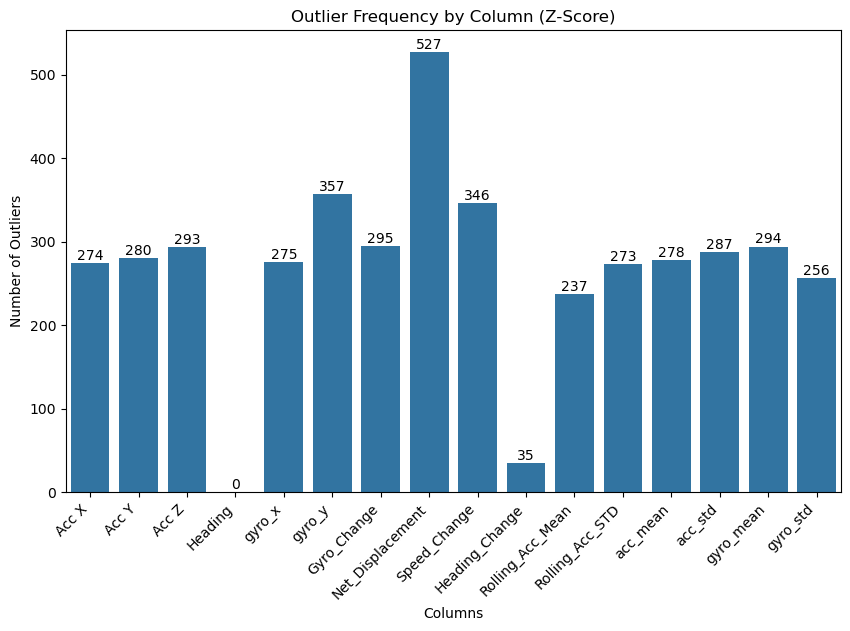

In [16]:
# Define a function to calculate Z-score and identify outliers
def calculate_zscore_outliers(data, column):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[(z_scores < -3) | (z_scores > 3)]
    return outliers, mean, std

# Apply the function to each numeric column
outliers_dict = defaultdict(list)
outlier_counts = {}

for col in ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
            'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']:
    outliers, mean, std = calculate_zscore_outliers(data, col)
    outliers_dict[col] = outliers
    outlier_counts[col] = len(outliers)
    print(f'{col}:')
    print(f'Mean: {mean}, Standard Deviation: {std}')
    print(f'Number of outliers: {len(outliers)}')
    print('---')

# Plotting the distribution and outliers in subplots
def plot_distribution_with_outliers(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Create rows as per requirement, 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
        axes[i].axvline(data[col].mean(), color='r', linestyle='--', label='Mean')
        axes[i].axvline(data[col].mean() + 3 * data[col].std(), color='g', linestyle='--', label='Mean ± 3 SD')
        axes[i].axvline(data[col].mean() - 3 * data[col].std(), color='g', linestyle='--')
        axes[i].set_title(f'Distribution and Outliers of {col}')
        axes[i].legend()

    for j in range(i + 1, len(axes)):  # Hide any unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to be plotted
columns = ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
            'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']
plot_distribution_with_outliers(data, columns)

# Plotting the outlier frequency chart
def plot_outlier_frequency(outlier_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
    plt.title('Outlier Frequency by Column (Z-Score)')
    plt.xlabel('Columns')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Outliers')
       
    # Adding text labels on top of each bar
    for i, count in enumerate(outlier_counts.values()):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
        
    plt.show()

plot_outlier_frequency(outlier_counts)

z_score_outlier = outlier_counts

In [18]:
z_score_outlier

{'Acc X': 274,
 'Acc Y': 280,
 'Acc Z': 293,
 'Heading': 0,
 'gyro_x': 275,
 'gyro_y': 357,
 'Gyro_Change': 295,
 'Net_Displacement': 527,
 'Speed_Change': 346,
 'Heading_Change': 35,
 'Rolling_Acc_Mean': 237,
 'Rolling_Acc_STD': 273,
 'acc_mean': 278,
 'acc_std': 287,
 'gyro_mean': 294,
 'gyro_std': 256}

In [26]:
iqr_outlier

{'Acc X': 1670,
 'Acc Y': 1632,
 'Acc Z': 1332,
 'Heading': 0,
 'gyro_x': 1804,
 'gyro_y': 1823,
 'Gyro_Change': 1833,
 'Net_Displacement': 1045,
 'Speed_Change': 1022,
 'Heading_Change': 6015,
 'Rolling_Acc_Mean': 647,
 'Rolling_Acc_STD': 872,
 'acc_mean': 1368,
 'acc_std': 900,
 'gyro_mean': 1763,
 'gyro_std': 818}

## Combined Bar Plot Comparison of Outlier Counts by Column

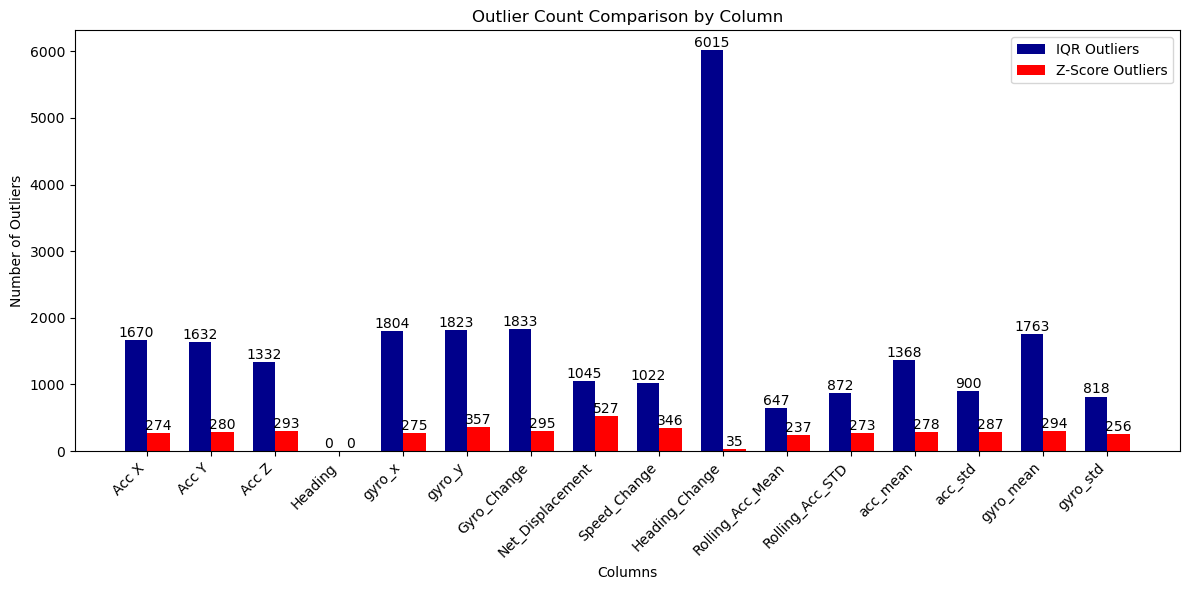

In [33]:
# Combined bar plot comparison with updated colors for outlier counts by column
def plot_outlier_comparison(iqr_outlier_counts, zscore_outlier_counts):
    columns = list(iqr_outlier_counts.keys())
    iqr_counts = list(iqr_outlier_counts.values())
    zscore_counts = list(zscore_outlier_counts.values())
    
    # Create a grouped bar plot for comparison with updated colors
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    indices = range(len(columns))
    
    # IQR bars with dark blue color
    plt.bar(indices, iqr_counts, width=bar_width, color='darkblue', label='IQR Outliers')
    
    # Z-score bars with bright red color
    plt.bar([i + bar_width for i in indices], zscore_counts, width=bar_width, color='red', label='Z-Score Outliers')
    
    # Labels and aesthetics
    plt.title('Outlier Count Comparison by Column')
    plt.xlabel('Columns')
    plt.xticks([i + bar_width / 2 for i in indices], columns, rotation=45, ha='right')
    plt.ylabel('Number of Outliers')
    plt.legend()
    
    # Show counts above each bar
    for i, count in enumerate(iqr_counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom', color='black')
    for i, count in enumerate(zscore_counts):
        plt.text(i + bar_width, count + 0.5, str(count), ha='center', va='bottom', color='black')
    
    plt.tight_layout()
    plt.show()

# Prepare outlier counts
iqr_outlier_counts = {}  # Dictionary of IQR-based outlier counts for each column
zscore_outlier_counts = {}  # Dictionary of Z-score-based outlier counts for each column

# Calculate outliers for each column and store the counts
for col in columns:
    iqr_outliers, iqr_lower, iqr_upper = calculate_iqr_outliers(data, col)
    zscore_outliers, z_mean, z_std = calculate_zscore_outliers(data, col)
    iqr_outlier_counts[col] = len(iqr_outliers)
    zscore_outlier_counts[col] = len(zscore_outliers)

# Plot the overall outlier count comparison
plot_outlier_comparison(iqr_outlier_counts, zscore_outlier_counts)


## Scatter Plot Comparison for IQR vs Z-Score Outliers

Scatter plot comparison for Acc X:


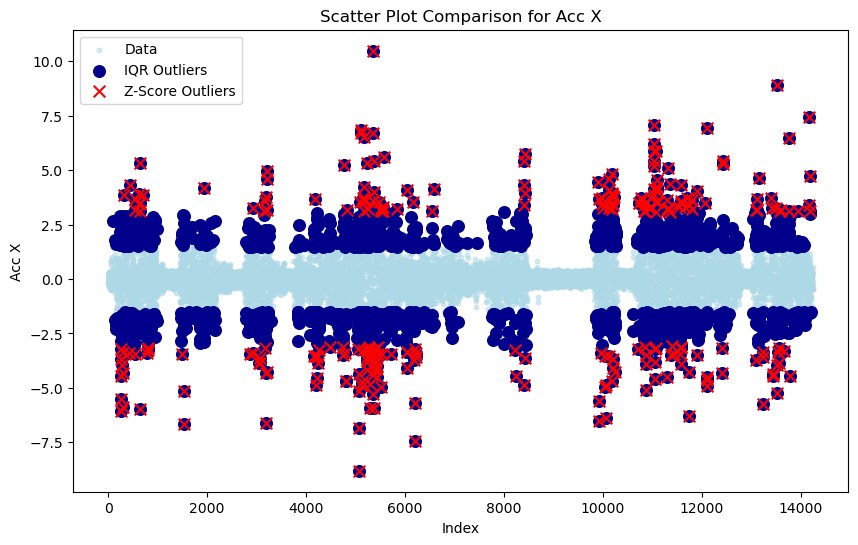

Scatter plot comparison for Acc Y:


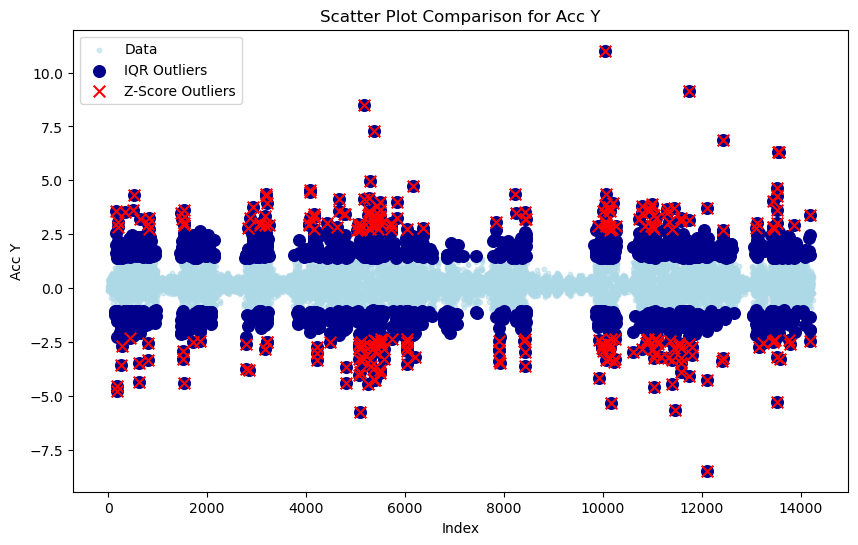

Scatter plot comparison for Acc Z:


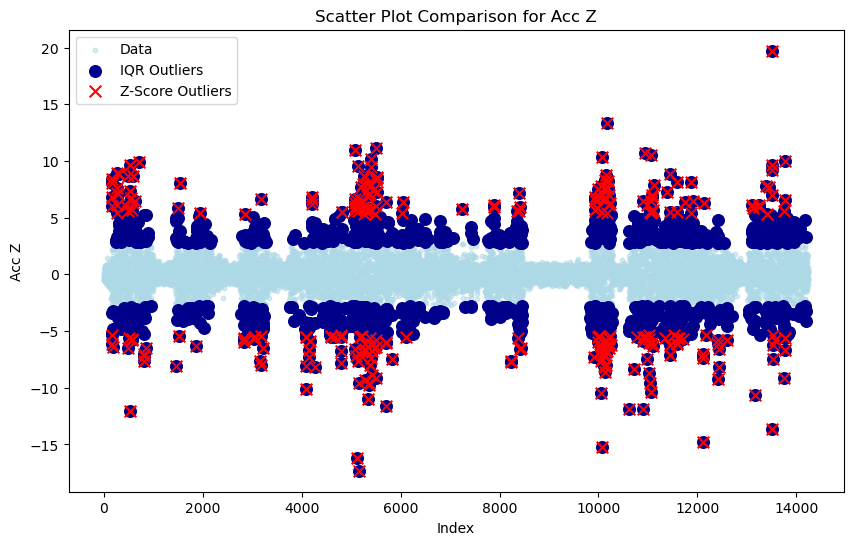

Scatter plot comparison for Heading:


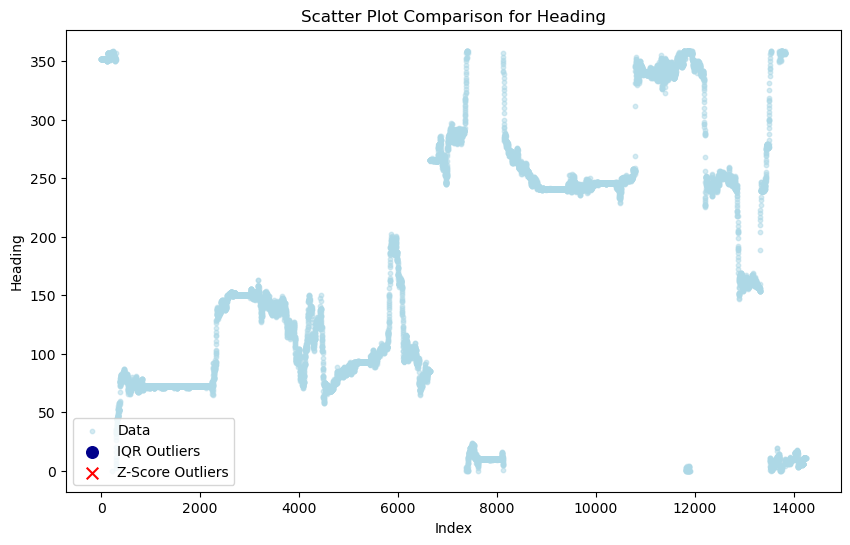

Scatter plot comparison for gyro_x:


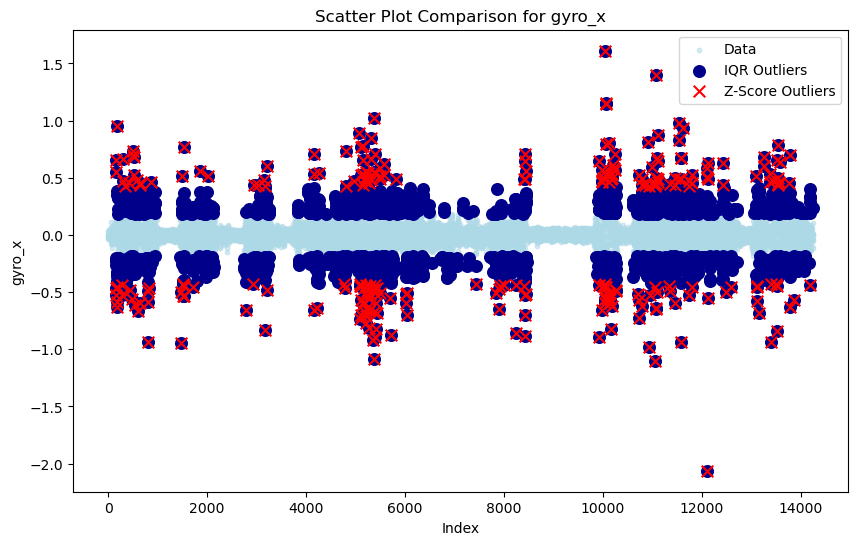

Scatter plot comparison for gyro_y:


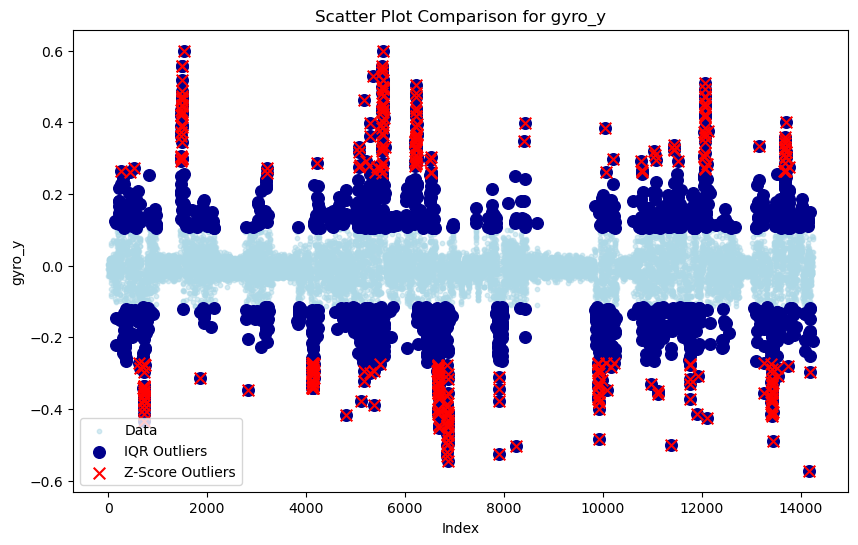

Scatter plot comparison for Gyro_Change:


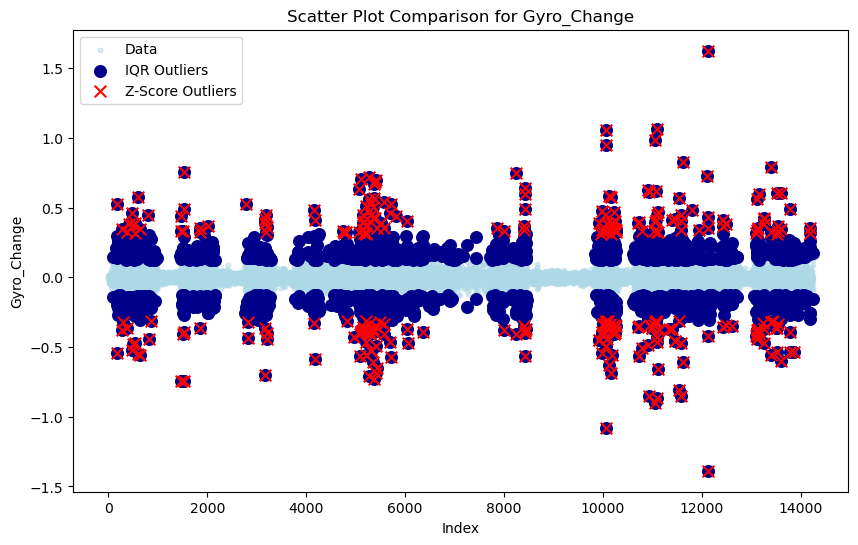

Scatter plot comparison for Net_Displacement:


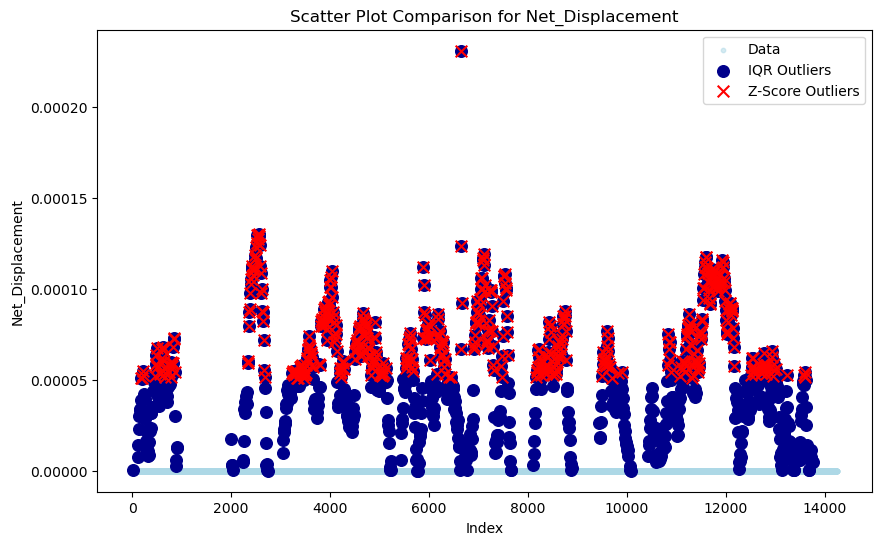

Scatter plot comparison for Speed_Change:


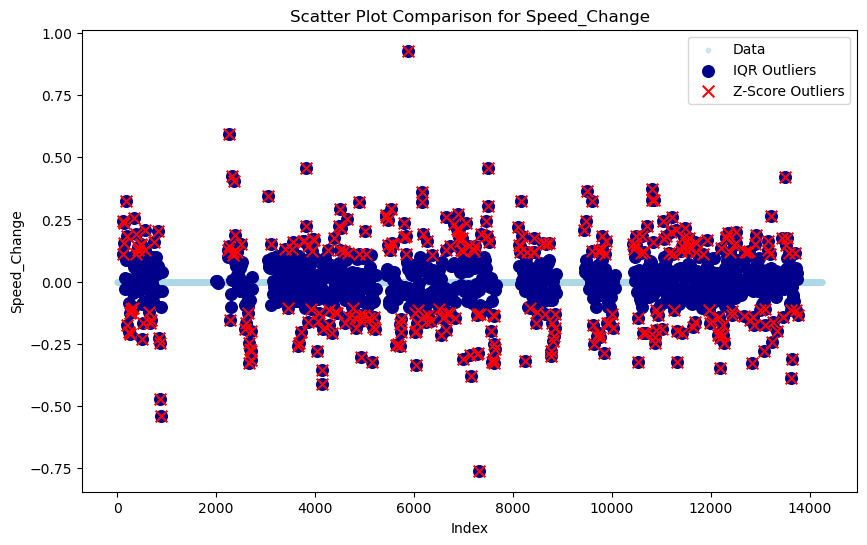

Scatter plot comparison for Heading_Change:


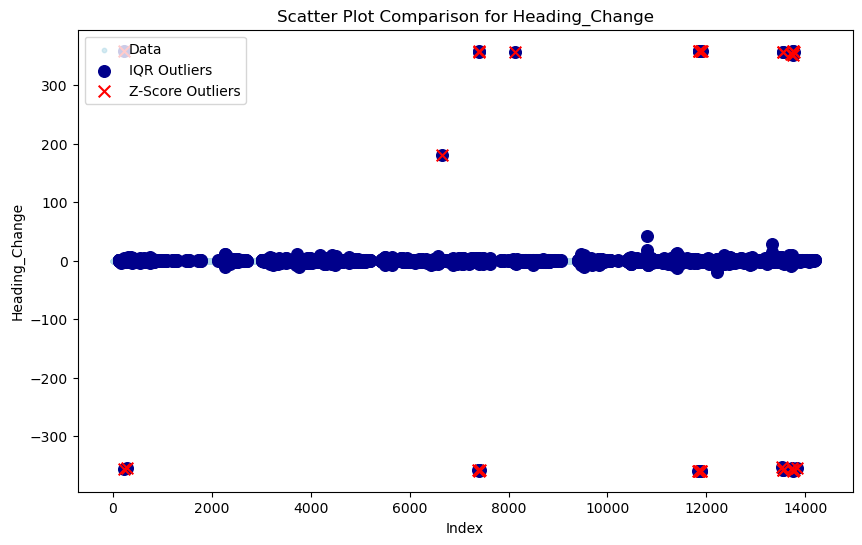

Scatter plot comparison for Rolling_Acc_Mean:


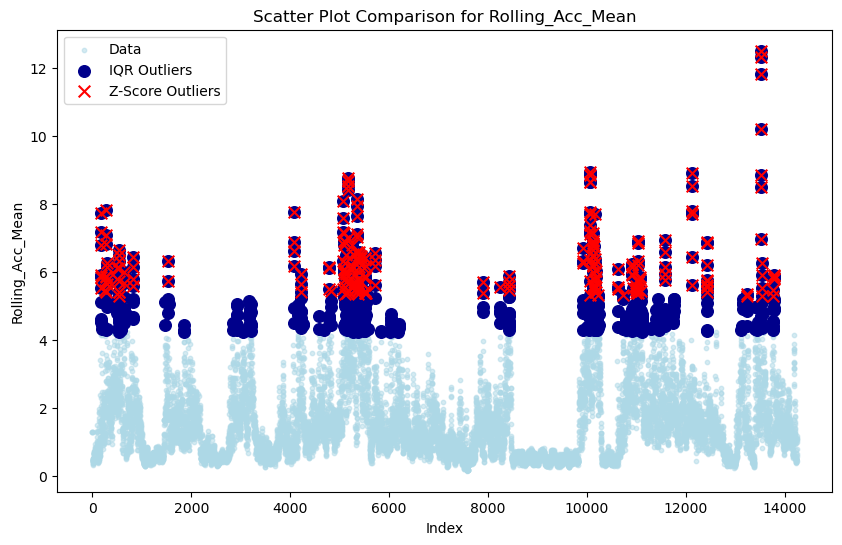

Scatter plot comparison for Rolling_Acc_STD:


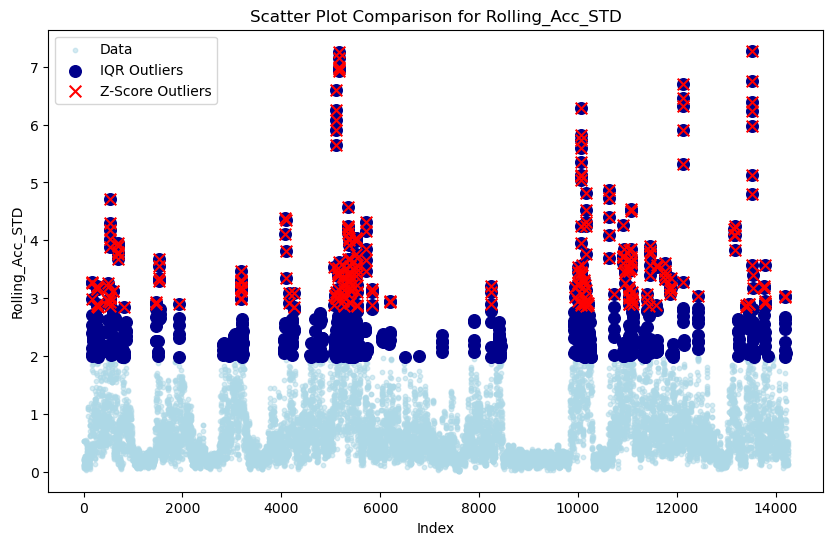

Scatter plot comparison for acc_mean:


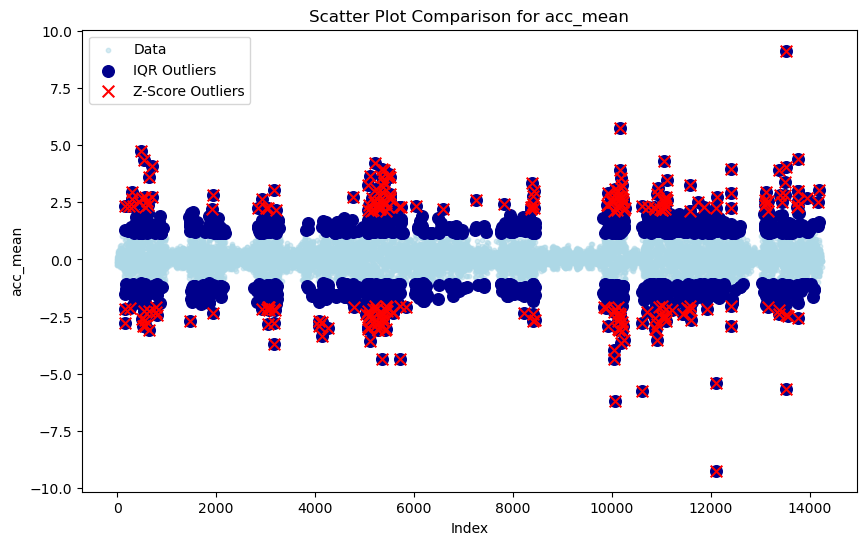

Scatter plot comparison for acc_std:


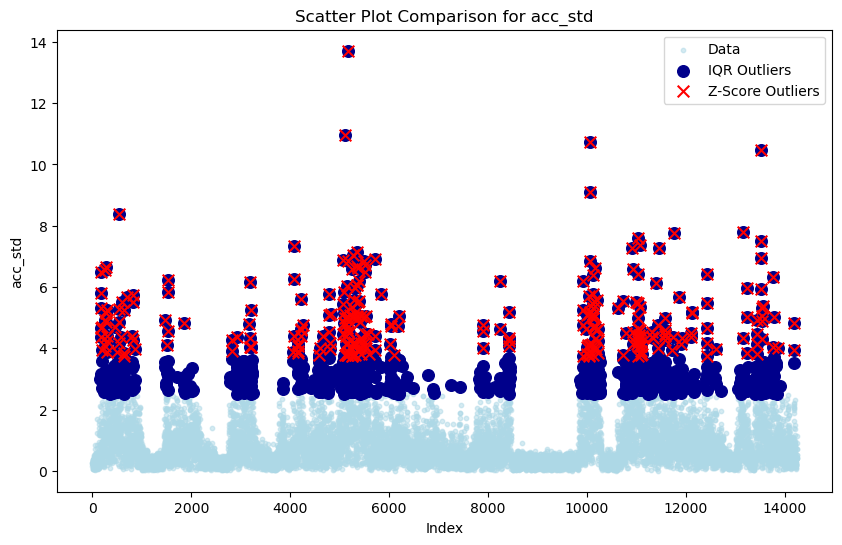

Scatter plot comparison for gyro_mean:


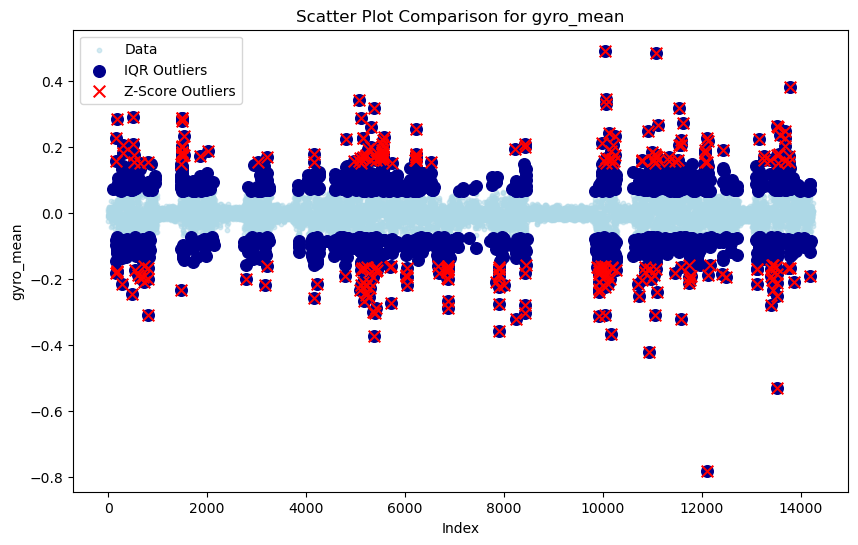

Scatter plot comparison for gyro_std:


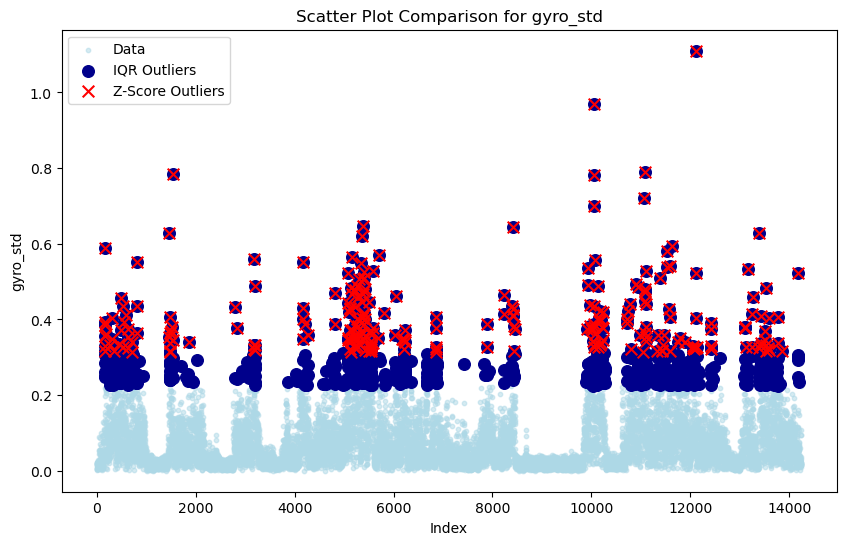

In [45]:
# Scatter plot to compare IQR vs Z-score outliers with updated colors
def plot_scatter_comparison(data, column, iqr_outliers, zscore_outliers):
    plt.figure(figsize=(10, 6))
    
    # Plot original data with light blue
    plt.scatter(data.index, data[column], color='lightblue', label='Data', alpha=0.5, s=10)
    
    # Plot IQR outliers with dark blue color
    plt.scatter(iqr_outliers.index, iqr_outliers[column], color='darkblue', label='IQR Outliers', s=70, marker='o')
    
    # Plot Z-score outliers with bright red color
    plt.scatter(zscore_outliers.index, zscore_outliers[column], color='red', label='Z-Score Outliers', s=70, marker='x')
    
    plt.title(f'Scatter Plot Comparison for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Example usage for each column
for col in columns:
    # Calculate IQR and Z-score outliers for each column
    iqr_outliers, iqr_lower, iqr_upper = calculate_iqr_outliers(data, col)
    zscore_outliers, z_mean, z_std = calculate_zscore_outliers(data, col)
    
    # Plot scatter comparison for each column
    print(f"Scatter plot comparison for {col}:")
    plot_scatter_comparison(data, col, iqr_outliers, zscore_outliers)


## Time-Series Plot with Anomalies (Time as Index)

Time-series plot with anomalies for Acc X:


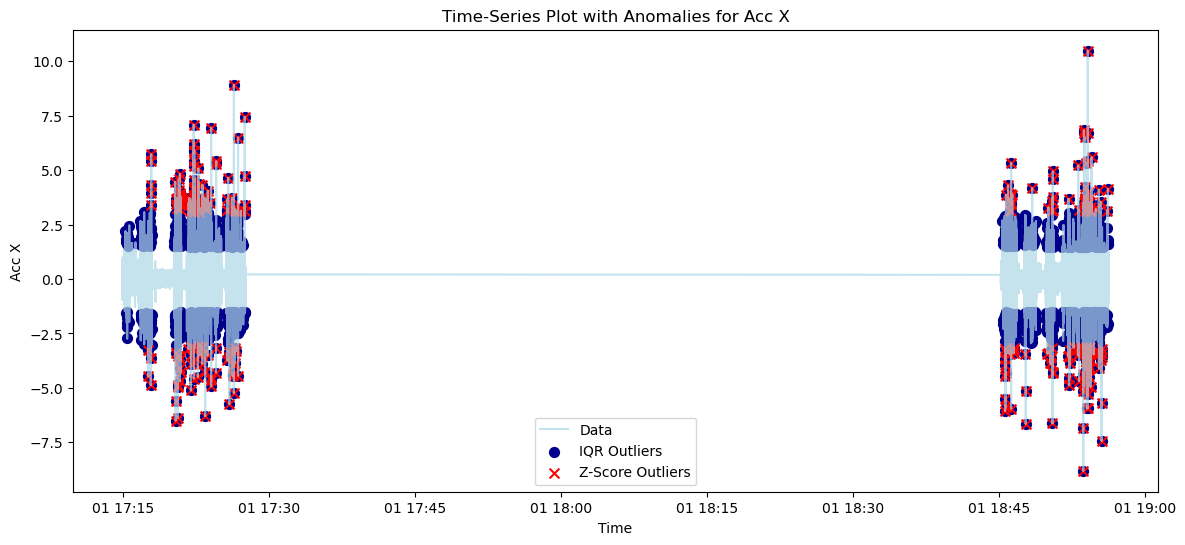

Time-series plot with anomalies for Acc Y:


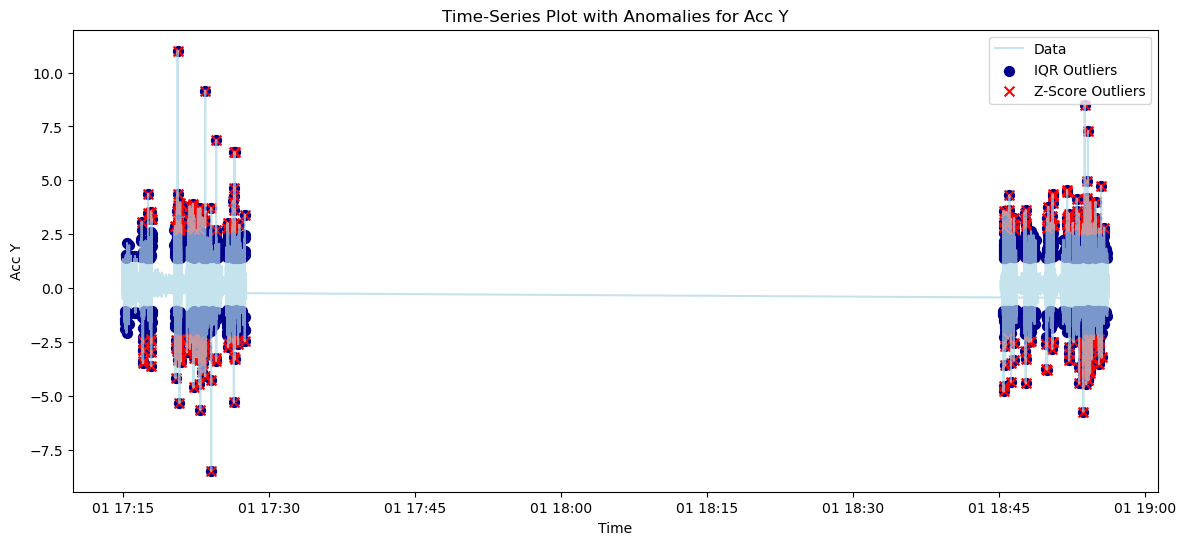

Time-series plot with anomalies for Acc Z:


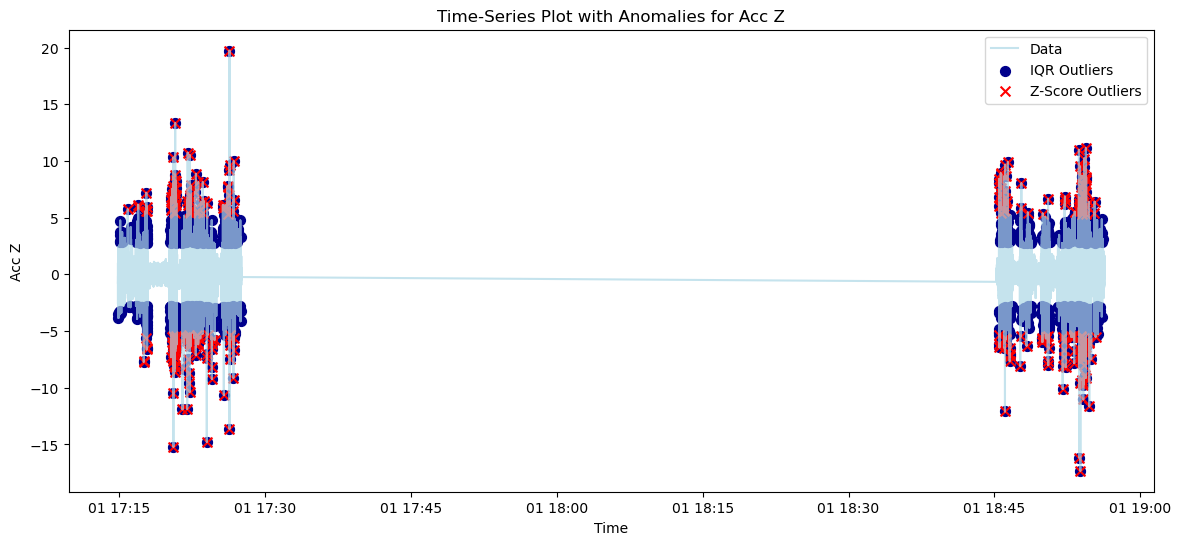

Time-series plot with anomalies for Heading:


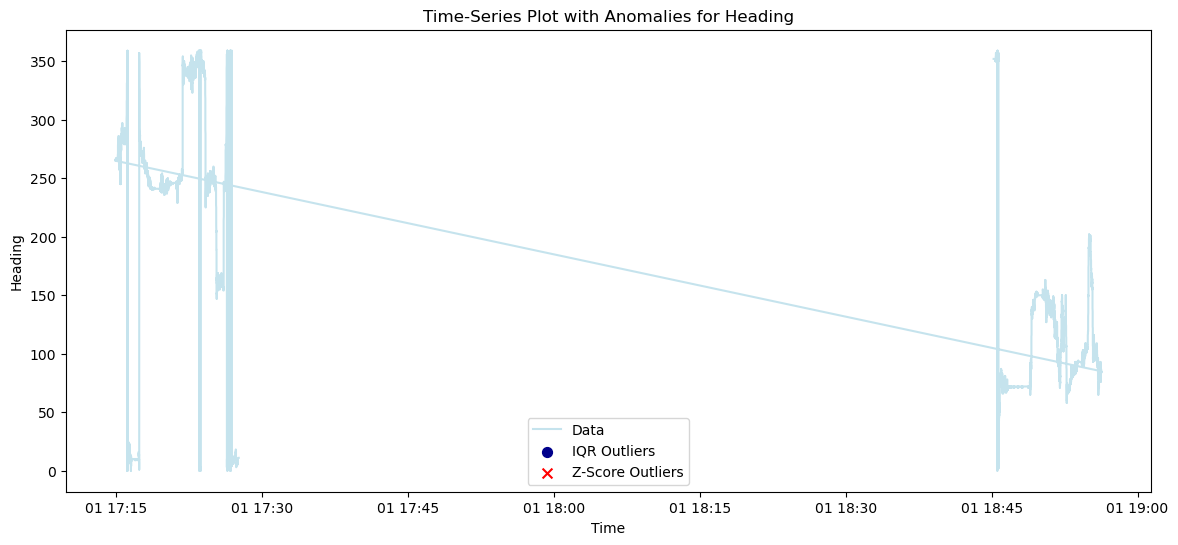

Time-series plot with anomalies for gyro_x:


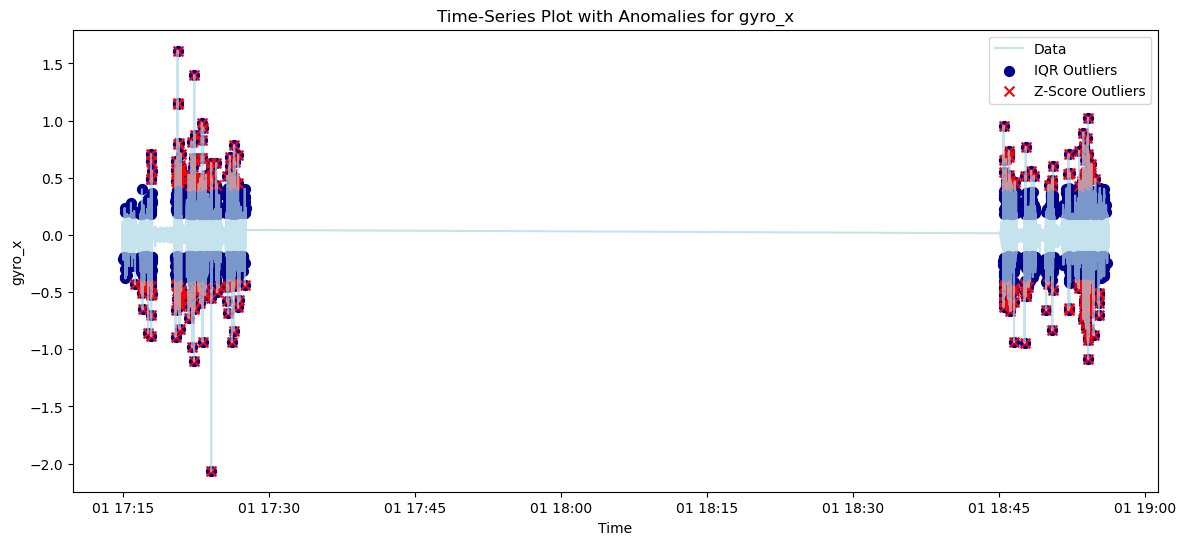

Time-series plot with anomalies for gyro_y:


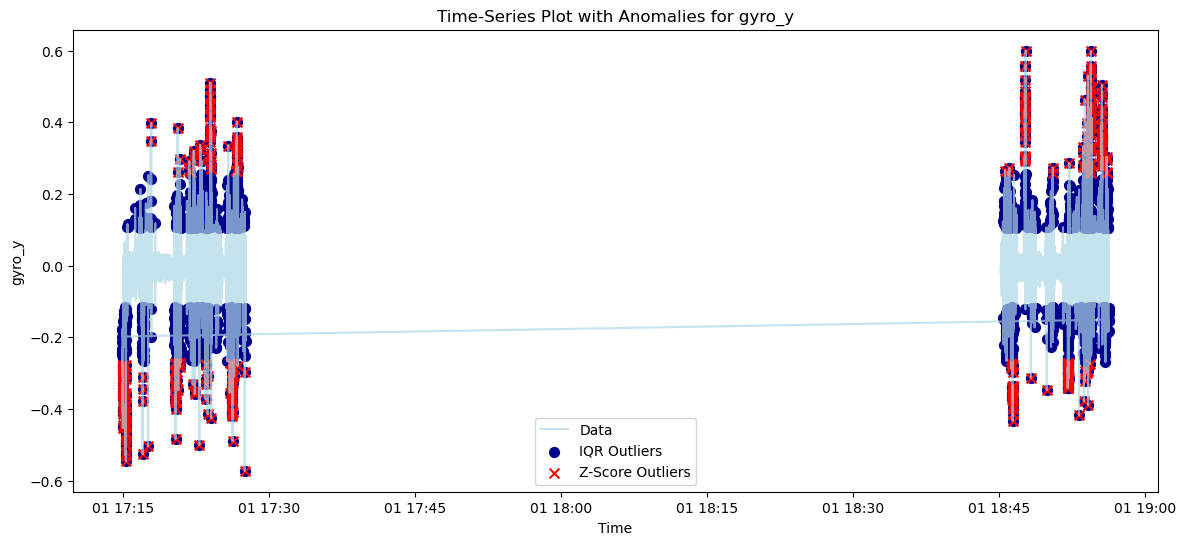

Time-series plot with anomalies for Gyro_Change:


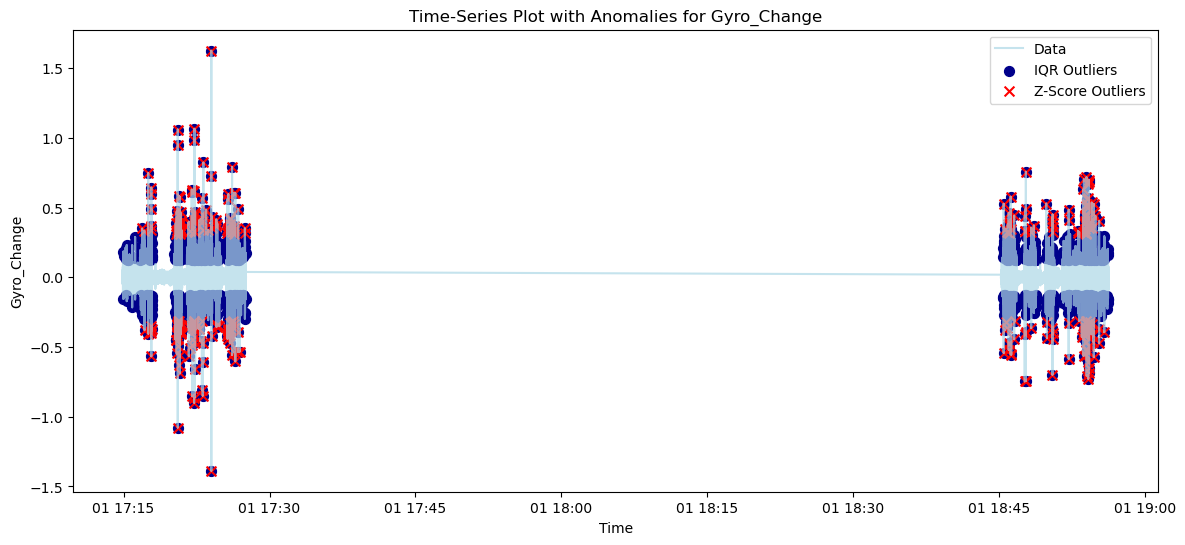

Time-series plot with anomalies for Net_Displacement:


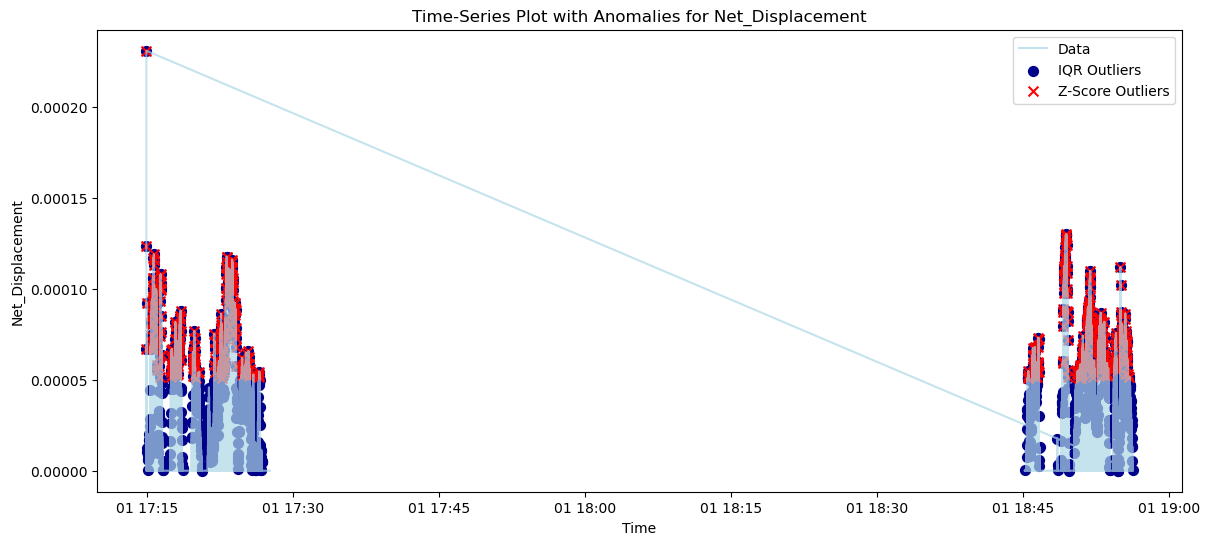

Time-series plot with anomalies for Speed_Change:


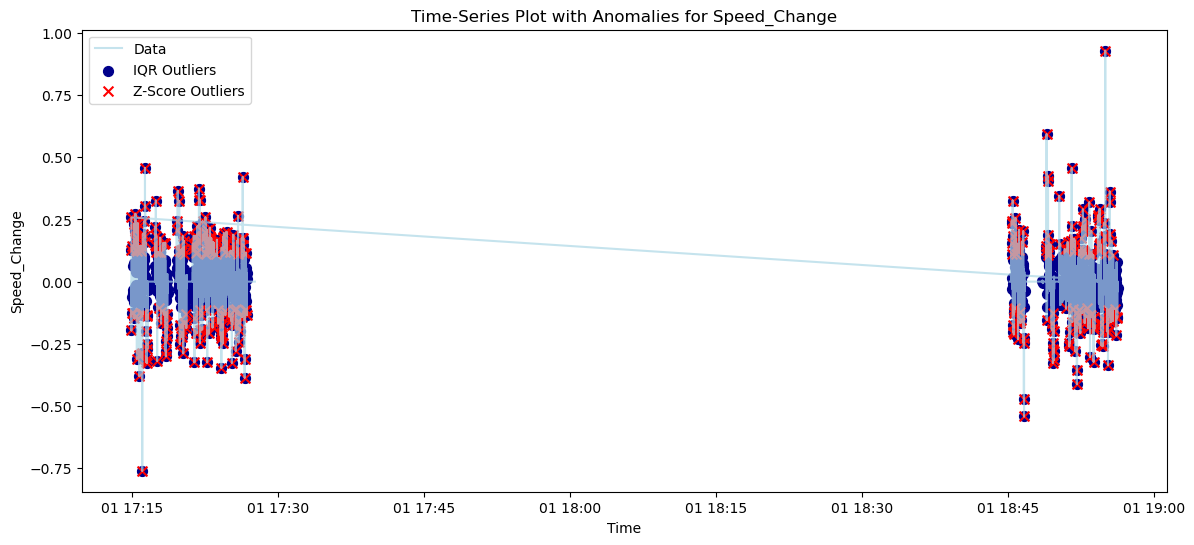

Time-series plot with anomalies for Heading_Change:


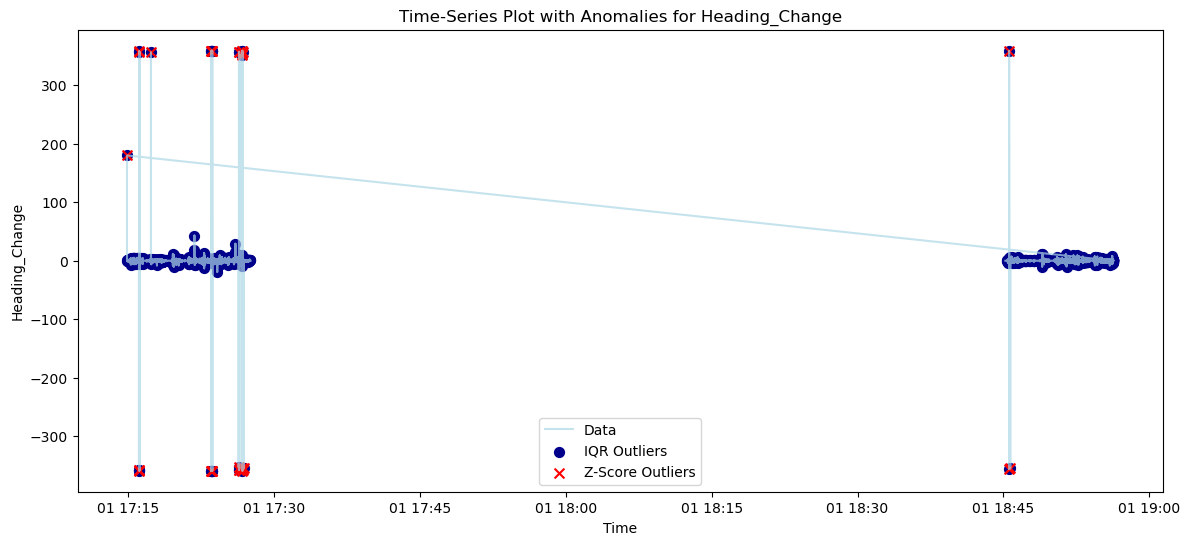

Time-series plot with anomalies for Rolling_Acc_Mean:


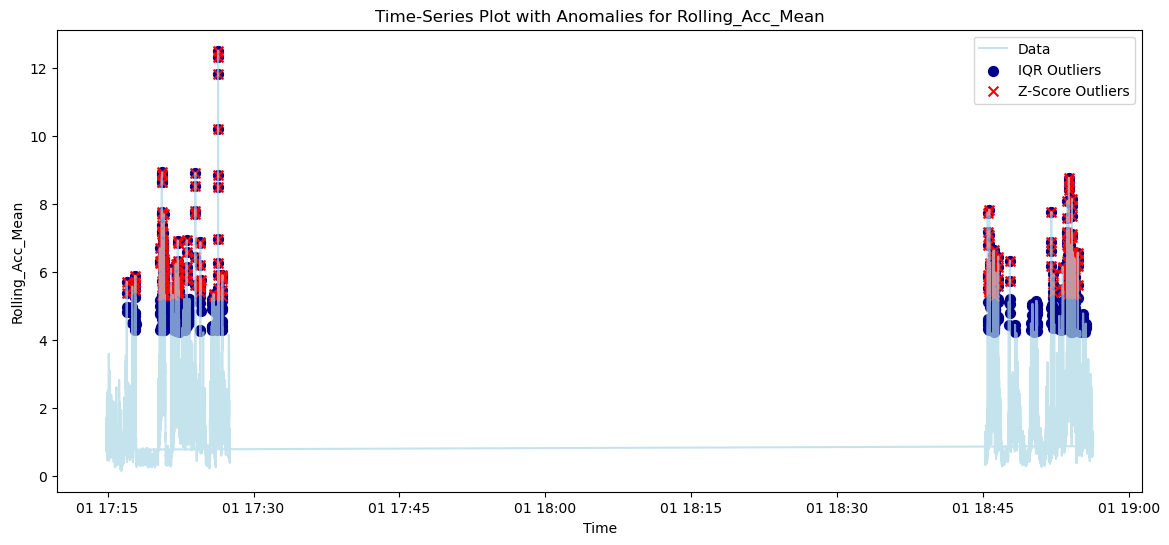

Time-series plot with anomalies for Rolling_Acc_STD:


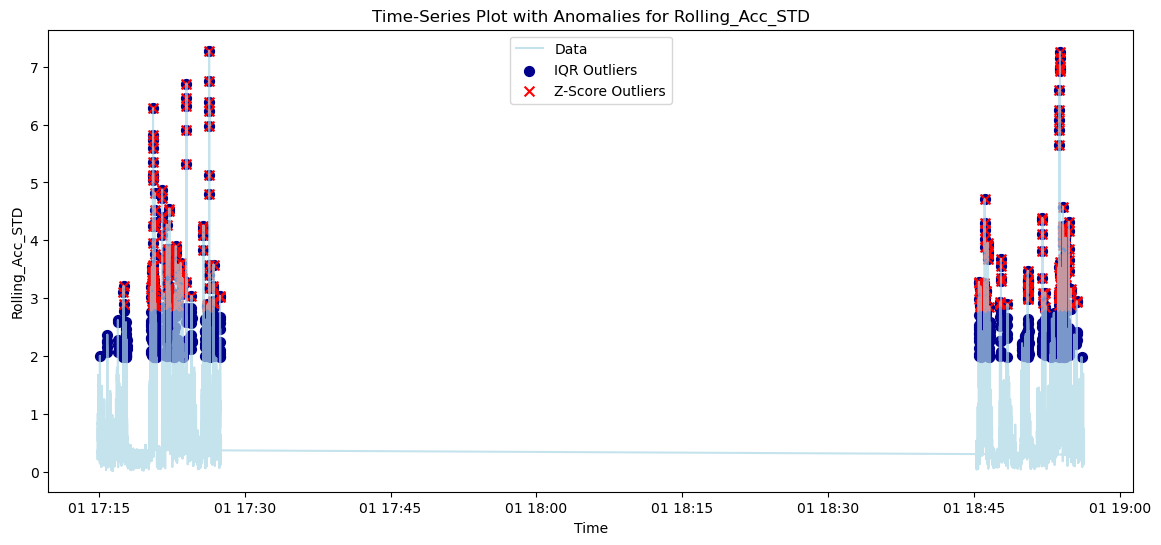

Time-series plot with anomalies for acc_mean:


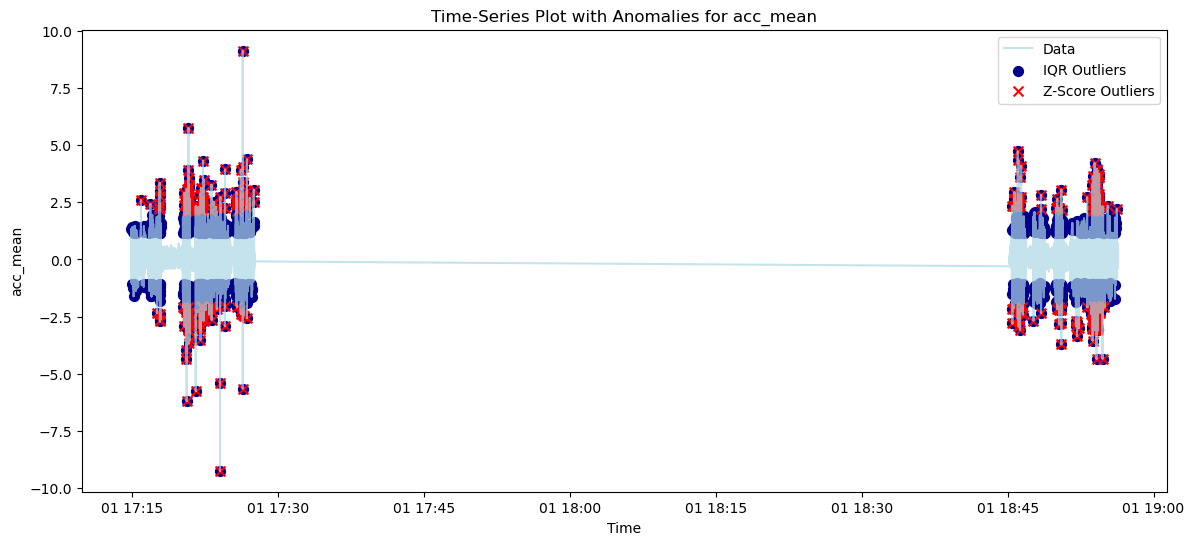

Time-series plot with anomalies for acc_std:


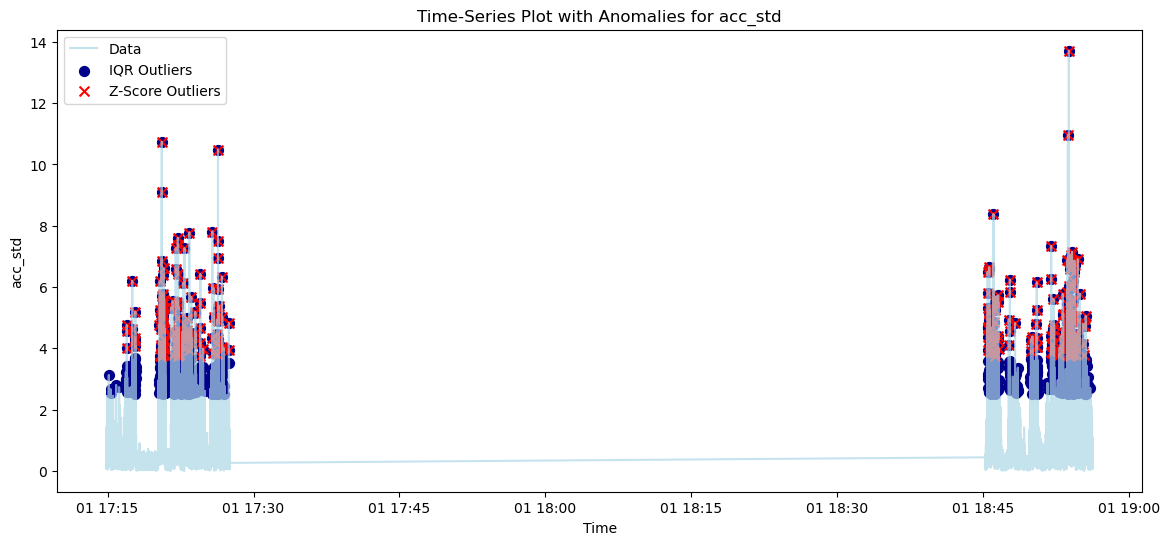

Time-series plot with anomalies for gyro_mean:


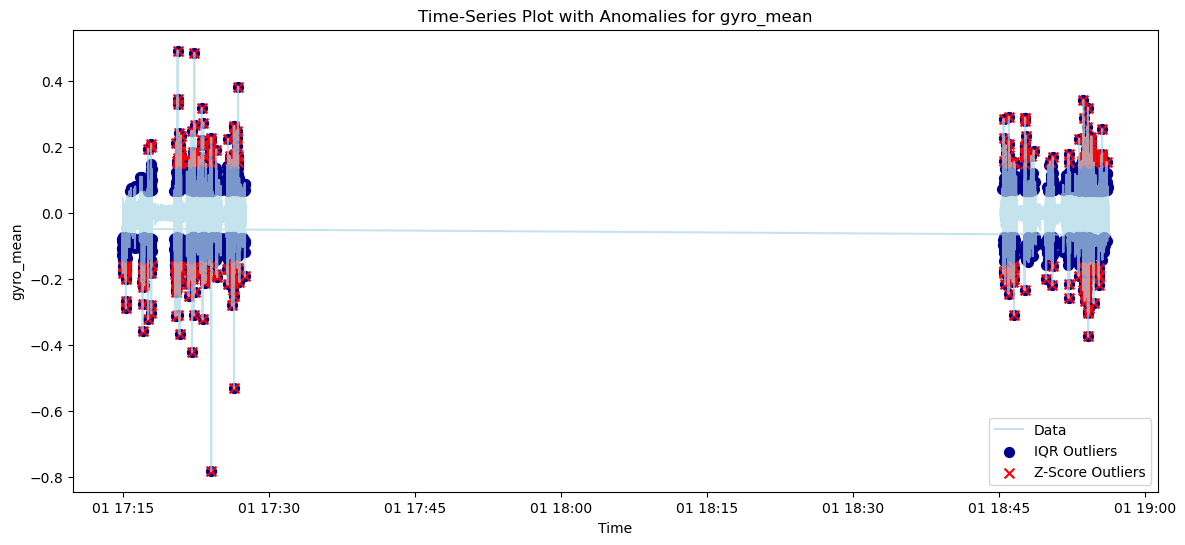

Time-series plot with anomalies for gyro_std:


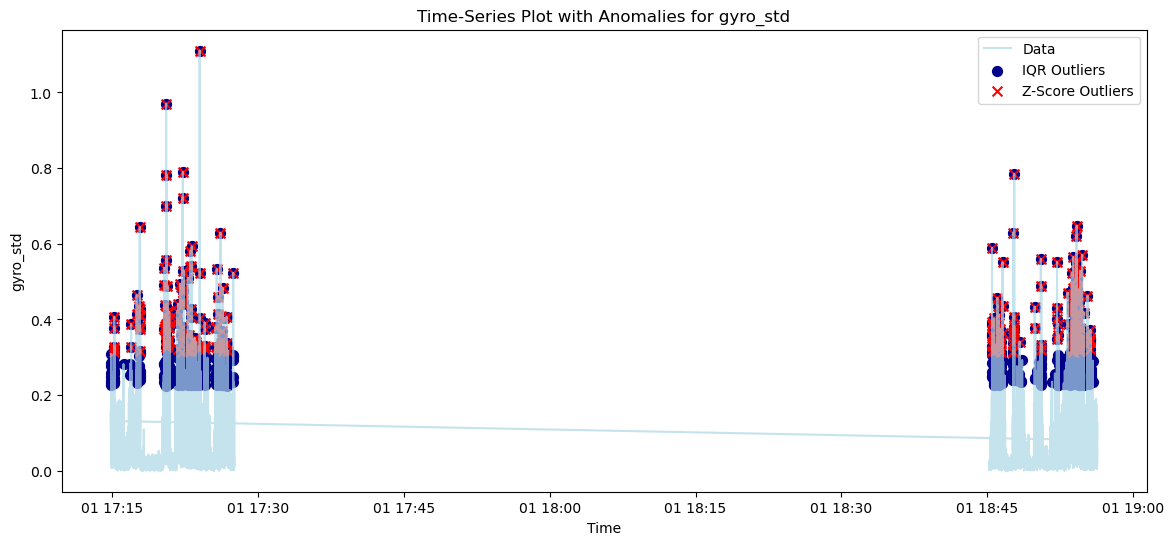

In [46]:
# Set 'Time' as the index for the data (ensure it's in datetime format first)
temp_data = data
temp_data['Time'] = pd.to_datetime(temp_data['Time'])
temp_data.set_index('Time', inplace=True)

# Visualize anomalies on time-series plot with updated colors
def plot_time_series_with_anomalies(temp_data, column, iqr_outliers, zscore_outliers):
    plt.figure(figsize=(14, 6))
    
    # Plot the time series with a light blue color
    plt.plot(temp_data.index, temp_data[column], label='Data', color='lightblue', alpha=0.7)
    
    # Plot IQR outliers with dark blue color
    plt.scatter(iqr_outliers.index, iqr_outliers[column], color='darkblue', label='IQR Outliers', s=50, marker='o')
    
    # Plot Z-score outliers with bright red color
    plt.scatter(zscore_outliers.index, zscore_outliers[column], color='red', label='Z-Score Outliers', s=50, marker='x')
    
    plt.title(f'Time-Series Plot with Anomalies for {column}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Example usage for each column
columns = ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
           'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']

for col in columns:
    # Calculate IQR and Z-score outliers for each column
    iqr_outliers, iqr_lower, iqr_upper = calculate_iqr_outliers(temp_data, col)
    zscore_outliers, z_mean, z_std = calculate_zscore_outliers(temp_data, col)
    
    # Plot time-series with anomalies for each column
    print(f"Time-series plot with anomalies for {col}:")
    plot_time_series_with_anomalies(data, col, iqr_outliers, zscore_outliers)


## Time-Series Plot with Anomalies

Time-series plot with anomalies for Acc X:


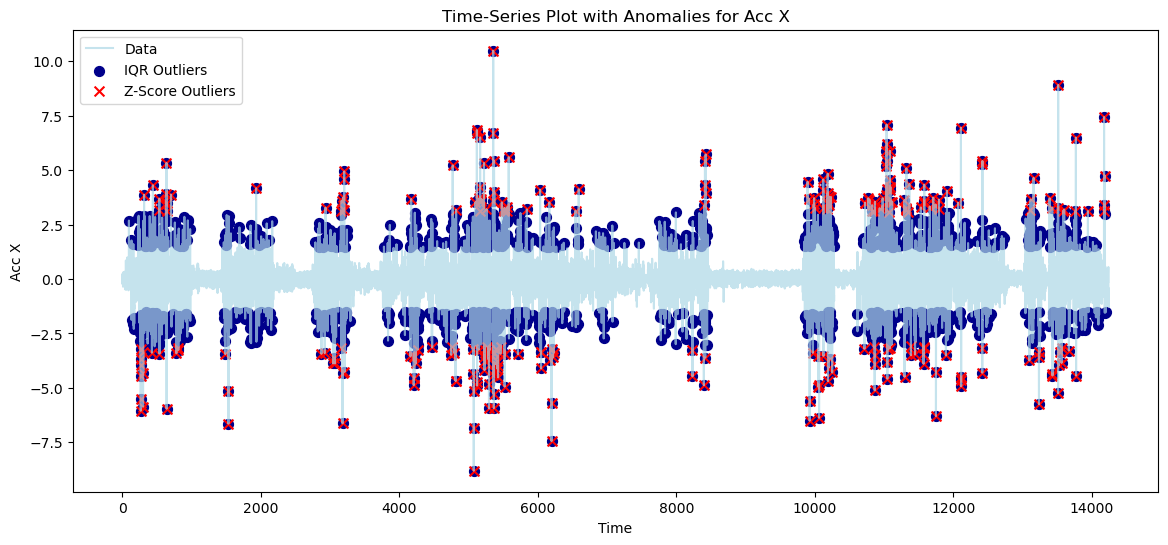

Time-series plot with anomalies for Acc Y:


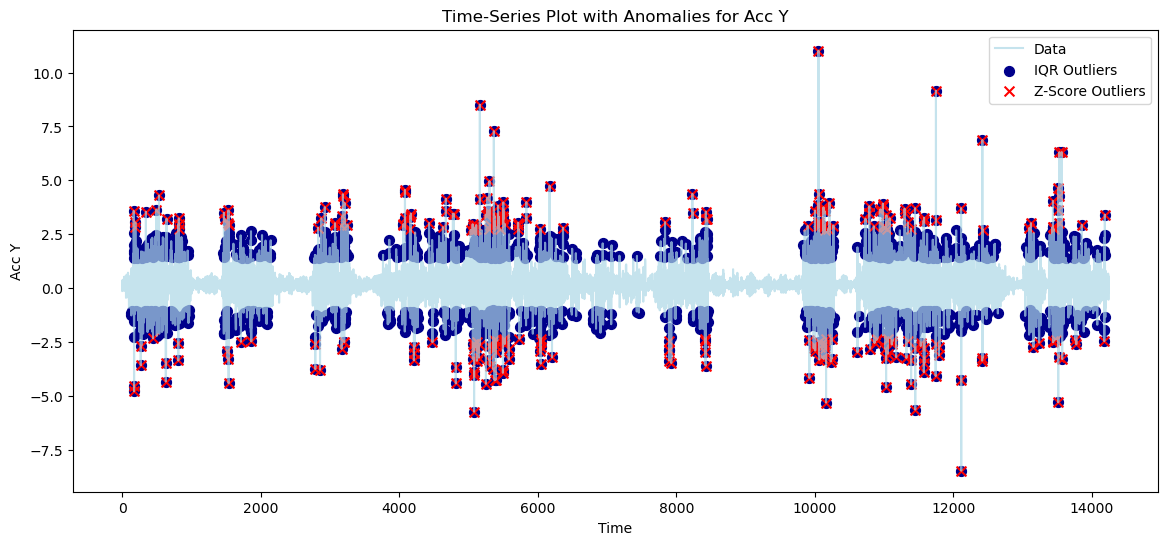

Time-series plot with anomalies for Acc Z:


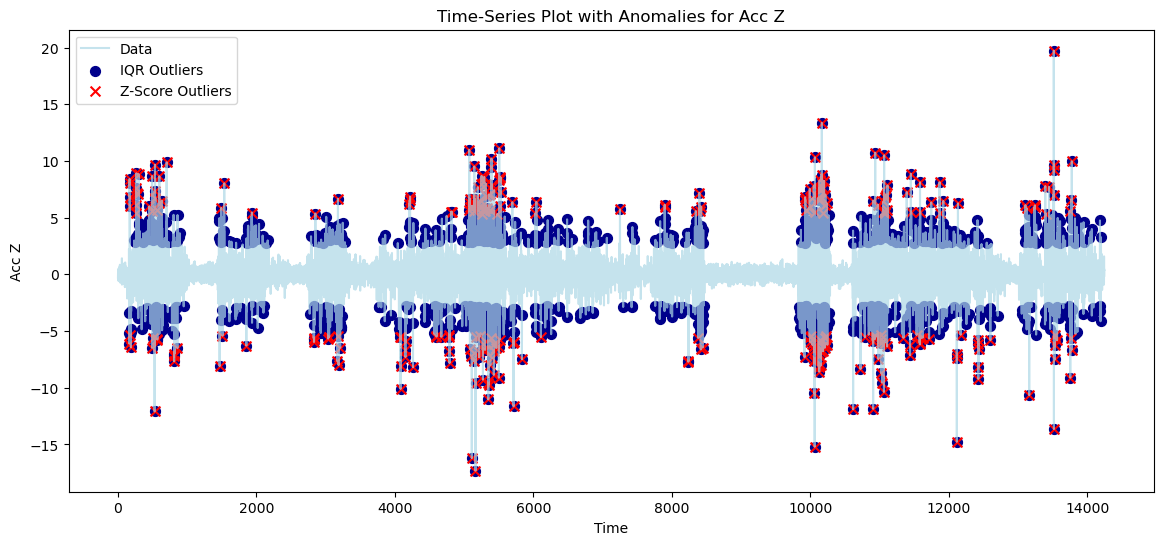

Time-series plot with anomalies for Heading:


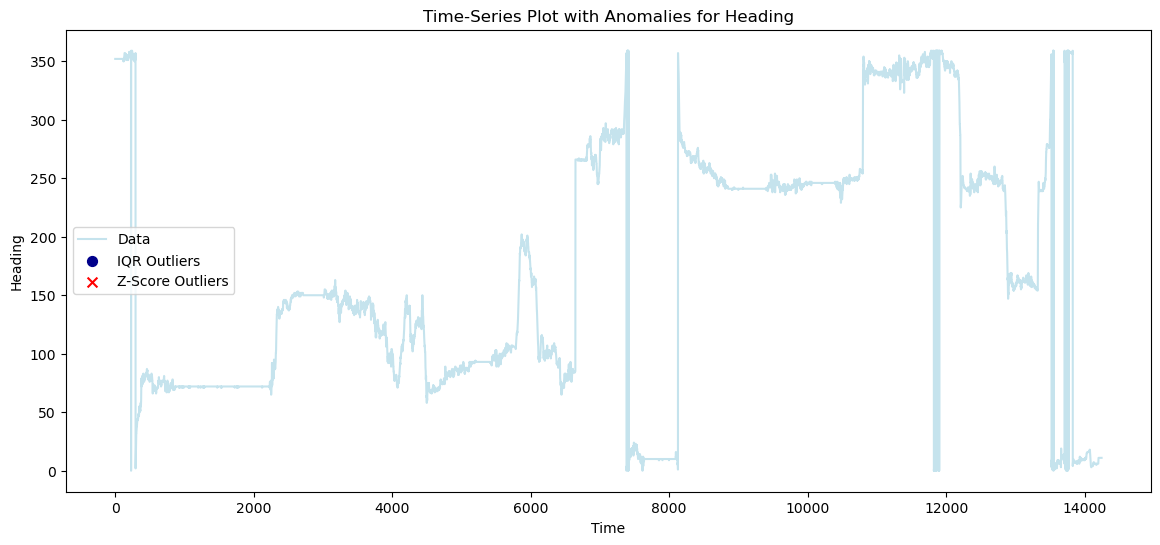

Time-series plot with anomalies for gyro_x:


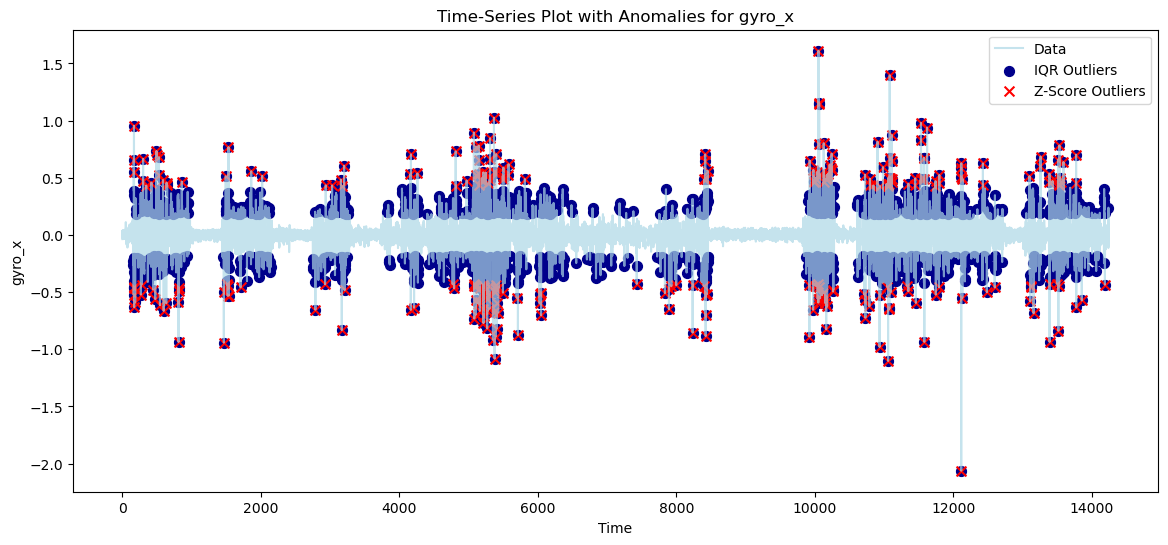

Time-series plot with anomalies for gyro_y:


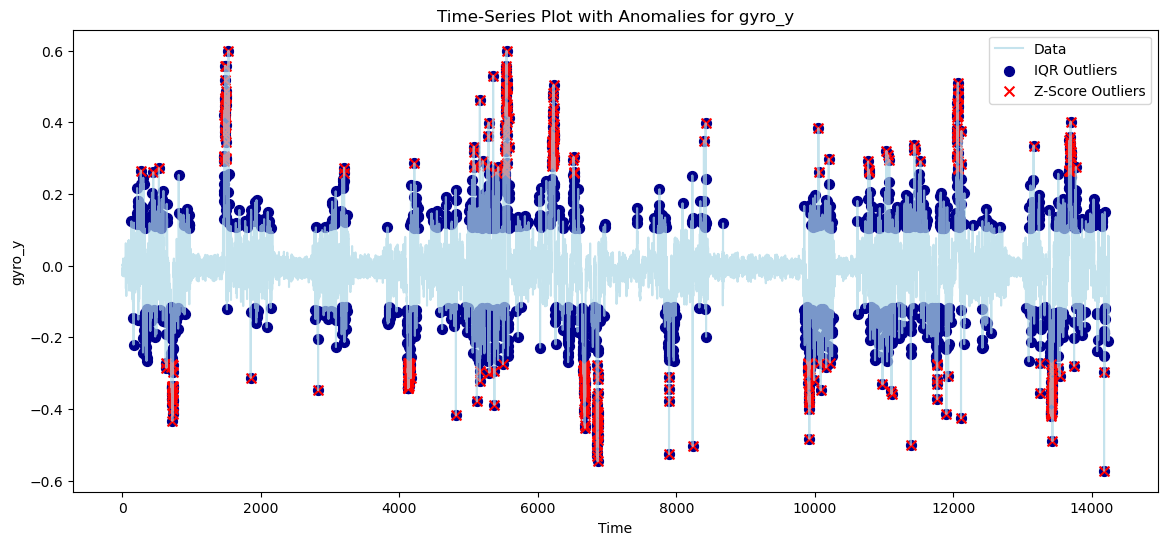

Time-series plot with anomalies for Gyro_Change:


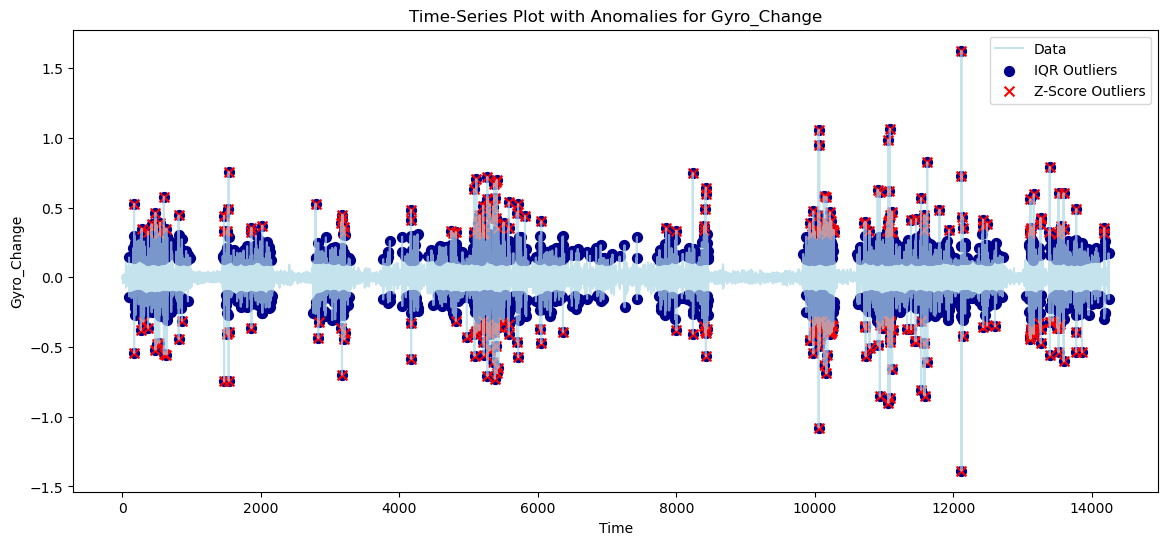

Time-series plot with anomalies for Net_Displacement:


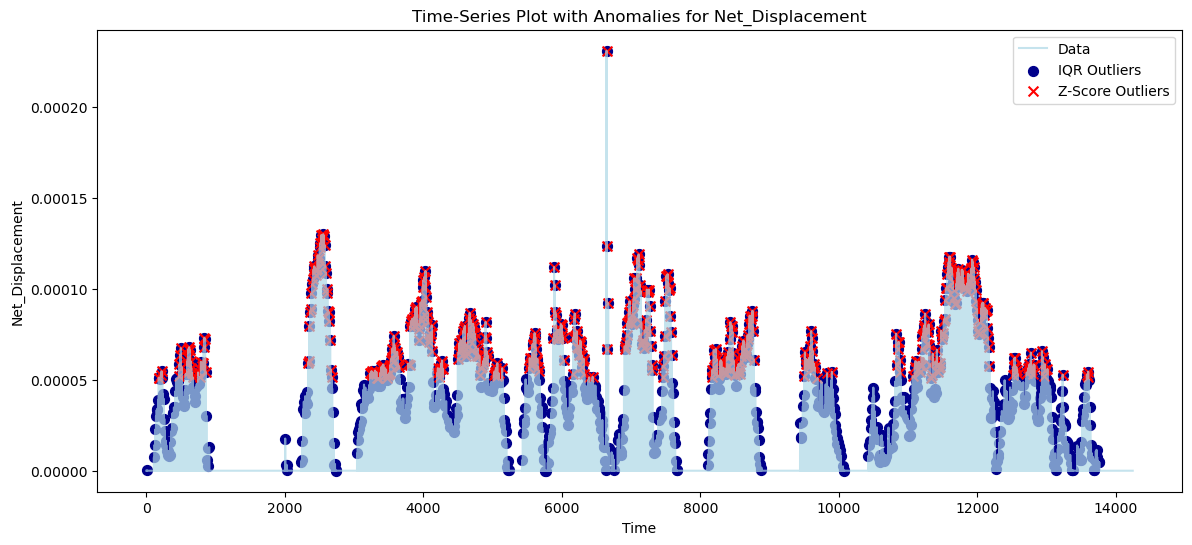

Time-series plot with anomalies for Speed_Change:


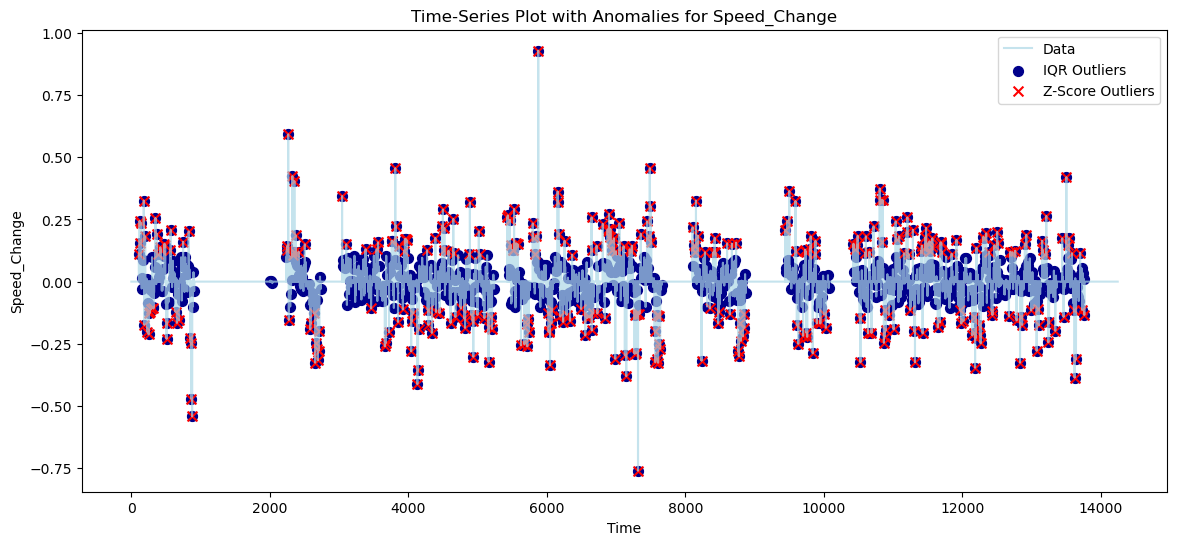

Time-series plot with anomalies for Heading_Change:


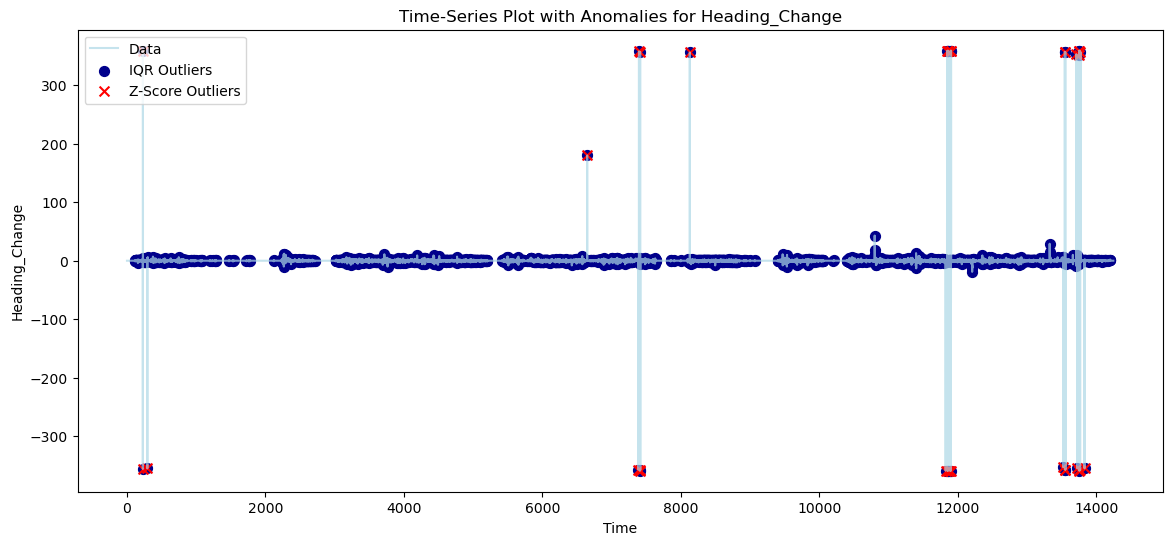

Time-series plot with anomalies for Rolling_Acc_Mean:


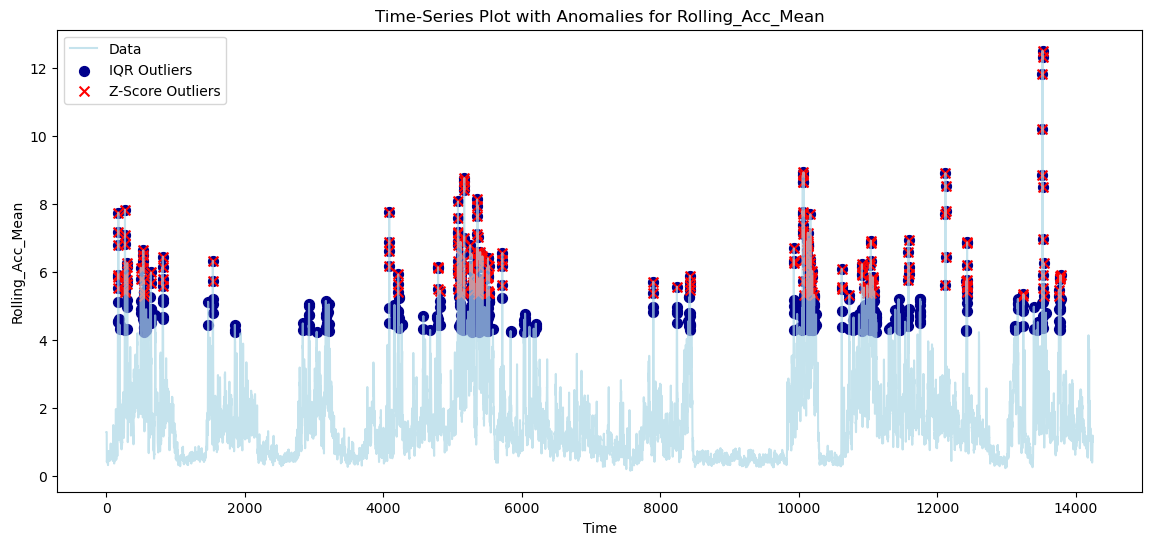

Time-series plot with anomalies for Rolling_Acc_STD:


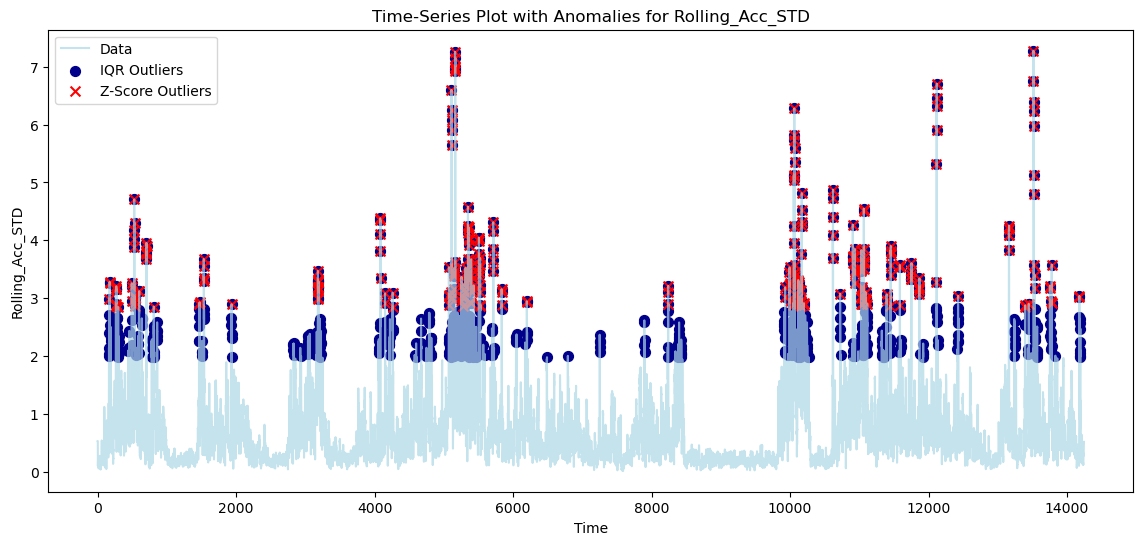

Time-series plot with anomalies for acc_mean:


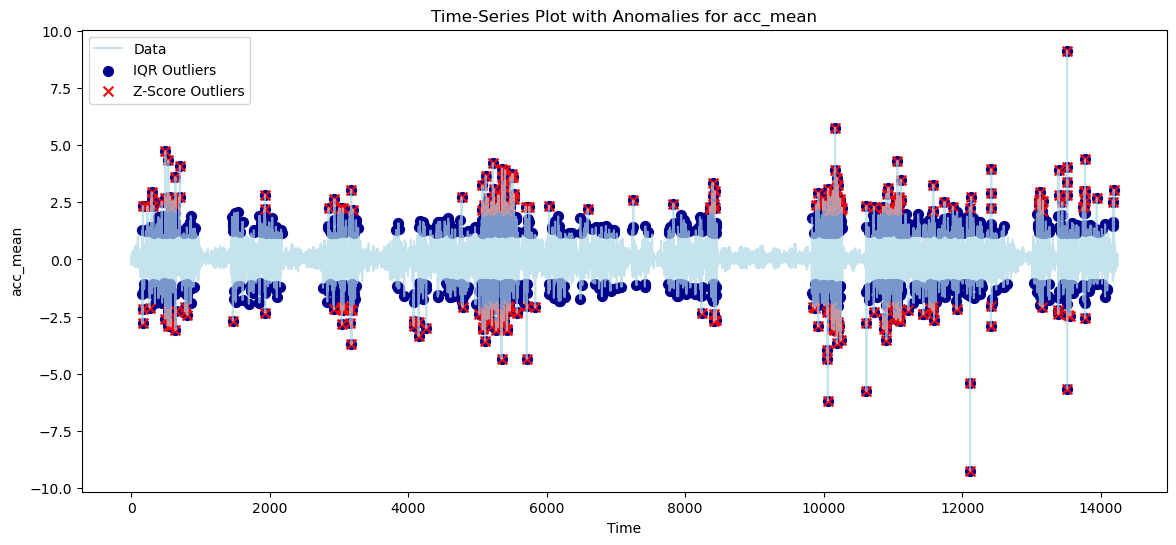

Time-series plot with anomalies for acc_std:


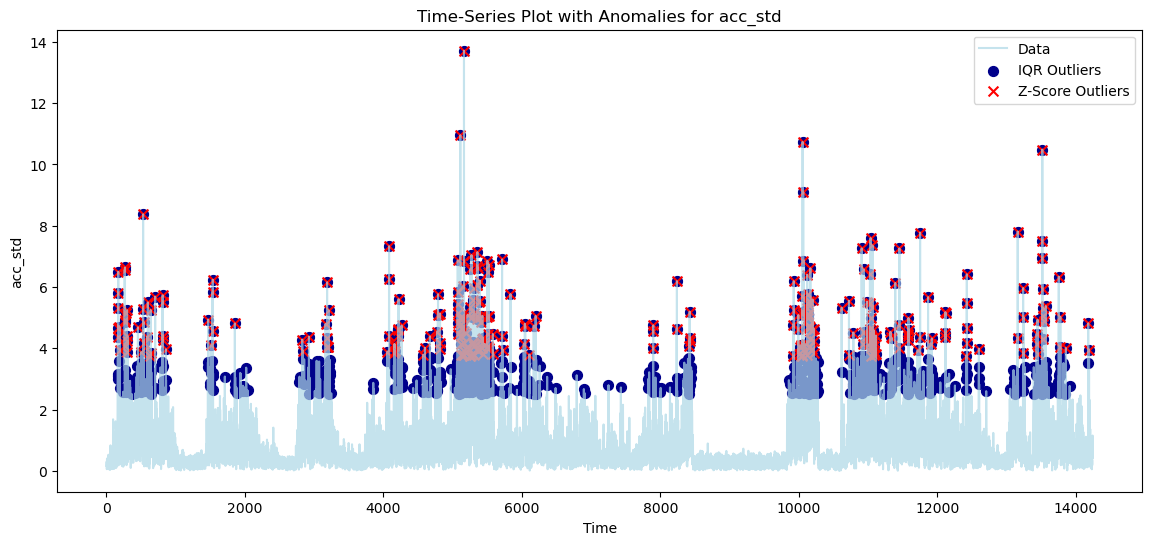

Time-series plot with anomalies for gyro_mean:


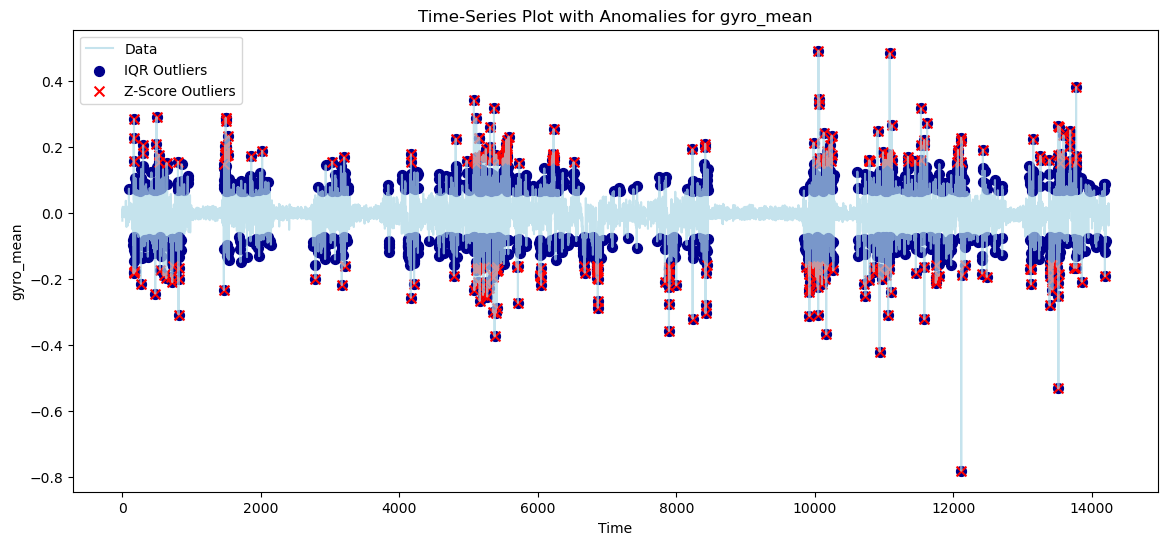

Time-series plot with anomalies for gyro_std:


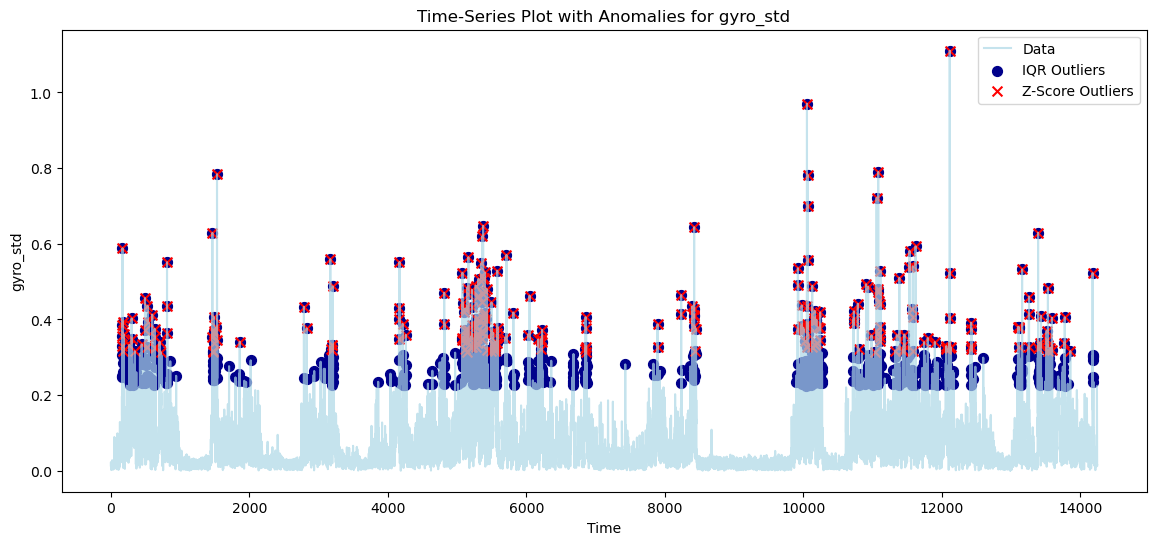

In [51]:
# Visualize anomalies on time-series plot with updated colors
def plot_time_series_with_anomalies(data, column, iqr_outliers, zscore_outliers):
    plt.figure(figsize=(14, 6))
    
    # Plot the time series with a light blue color
    plt.plot(data.index, data[column], label='Data', color='lightblue', alpha=0.7)
    
    # Plot IQR outliers with dark blue color
    plt.scatter(iqr_outliers.index, iqr_outliers[column], color='darkblue', label='IQR Outliers', s=50, marker='o')
    
    # Plot Z-score outliers with bright red color
    plt.scatter(zscore_outliers.index, zscore_outliers[column], color='red', label='Z-Score Outliers', s=50, marker='x')
    
    plt.title(f'Time-Series Plot with Anomalies for {column}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Example usage for each column
columns = ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
           'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']

for col in columns:
    # Calculate IQR and Z-score outliers for each column
    iqr_outliers, iqr_lower, iqr_upper = calculate_iqr_outliers(data, col)
    zscore_outliers, z_mean, z_std = calculate_zscore_outliers(data, col)
    
    # Plot time-series with anomalies for each column
    print(f"Time-series plot with anomalies for {col}:")
    plot_time_series_with_anomalies(data, col, iqr_outliers, zscore_outliers)
